<a href="https://colab.research.google.com/github/Phubordin/portfolio-project/blob/main/portfolio-project/P05-EDA-and-Comparison-of-NYC-Flights-Data-2013-vs-2023-with-R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 คำแนะนำ :**

1. ถ้าเปิดดูจาก Google Colab ให้กด Table of Contents ที่แถบด้านซ้าย เพื่อไปยังหัวข้อที่สนใจ

2. ถ้าเปิดดูจาก Github ให้กด Ctrl+F เพื่อไปยังหัวข้อที่สนใจ (ที่บอกมาจาก  [My Portfolio Website](https://phubordin.github.io/My-Portfolio-Website/project_nycflight13_23_dsb10.html))

Note : เมื่อพึ่งเข้า Colab แนะนำให้ลองกด..

```
Runtime > Run all (รันทุกเซลล์) ❗️ ใช้เวลารันนานกว่า >25 นาที ไม่แนะนำให้รันซ้ำ
```

เมื่อรู้สึกกว่า Colab ช้าให้กด

```
Runtime > Restart Session and Run all (ลบแคชและรันทุกเซลล์ใหม่) ❗️ ใช้เวลารันนานกว่า >25 นาที ไม่แนะนำให้รันซ้ำ
```

สามารถลองเลื่อนดูผลลัพธ์ได้เลย


# Install Packages

📍 **ติดตั้งใหม่ทุกครั้ง** เมื่อยกเลิกเชื่อมต่อกับ Google Colab


In [ ]:
# ดาวน์โหลดนาน ~ 23-25 minutes ใช้หาพิกัดตำแหน่งว่าสนามบินตั้งอยู่ที่รัฐไหน
install.packages("rnaturalearth")

# ติดตั้ง Data เที่ยวบิน New York City
install.packages(c("nycflights13", "nycflights23"))

# ติดตั้ง ไลบรารีสำหรับการแสดงผมแบบ HTML เพื่อให้เข้าใจผลลัพธ์ในแต่ละการรันเซลล์แต่ละเซลล์ได้ชัดเจน
install.packages("IRdisplay")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘sf’, ‘terra’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **Create a Marker Result Function Using HTML**

In [ ]:
# ไว้เป็นแสดง Title ในแต่ละเซลล์การรันโค้ด
library(IRdisplay)

# ออกแบบฟังก์ชัน ที่มีค่าเริ่มคืิอ พื้นหลังสีฟ้า background_color, ตัวอักษรสีดำ color, รับ input text, จัดให้อยู่กึ่งกลาง align, ขนาดตัวอักษร 18px
styled_note <- function(text, color = "Black", background_color = "powderblue", align = "center", size = "18px") {
  html <- sprintf(
    "<div style='text-align:%s; color:%s; background-color:%s; font-weight:bold; font-size:%s;'>%s</div>",
    align, color, background_color, size, text
  )
  display_html(html)
}

# เรียกใช้งานแบบ กำหนดค่าเอง
styled_note("Test_Specific", "Orange", "Gray", "Left", "22px")

# เรียกใช้งานแบบ ค่าเริ่มต้น
styled_note("Test_Default")


Test_Specific

Test_Default

# Load Data/Library



1. เรียกใช้ `library()` อื่นๆ สำหรับการสำรวจข้อมูลเที่ยวบินใน New York City ในปี `2013` และ `2023`

2. เรียกใช้ nycflights13 database ➤ เก็บแต่ละตารางไว้ใน list `data_2013`

3. เรียกใช้ nycflights23 database ➤ เก็บแต่ละไว้ใน list `data_2023`



## Other Libraries

In [ ]:
# glue: ใช้สำหรับสร้างข้อความด้วยการฝังค่า object หรือ variable ลงใน string ได้อย่างสะดวก เช่น glue("Hello {name}")
# rnaturalearth: ใช้ดึงข้อมูลภูมิศาสตร์ (geospatial data) ของประเทศ ทวีป หรือขอบเขตต่าง ๆ จาก Natural Earth ในรูปแบบที่พร้อมใช้งานกับงานวิเคราะห์แผนที่
# sf: รองรับการจัดการข้อมูลเชิงพื้นที่ (spatial data) ด้วยโครงสร้างแบบ Simple Features ซึ่งเป็นมาตรฐานสำหรับการทำงานกับแผนที่และข้อมูล GIS ใน R
library(tidyverse) # แพ็คเกจที่รวบรวมเครื่องใช้จัดการข้อมูล และนำเสนอข้อมูลด
library(glue)
library(rnaturalearth)
library(sf)

# จริงๆไม่จำเป็นต้องโหลดแล้วก็ได้ เพราะว่ามันรวมอยู่ใน library(tidyverse)
library(dplyr)
library(ggplot2) # ใช้ในการทำ Data Visualization (จริงๆ มันถูกโหลดแล้วใน library(tidyversse))
library(purrr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE



## Data / Library 2013

In [ ]:
# โหลด Data New York City 2013 ❗️
library(nycflights13)

# สร้าง list เก็บ table ที่อยู่ใน nycflights13 แต่ละ Tables
data_2013 <- list() # empty list รอ loop เพื่อเก็บแต่ละ Tables

# เรียกตาราง และ assign ตารางเหล่านั้น เข้าไปที่ data_2013 list พร้อม Preview 6 แถวแรกของแต่ละ Tables
# ls("package:nycflights13") คืนชื่อ object (data frame)
# get(i, envir = asNamespace("nycflights13")) ดึง object จริงจาก package
# head() แสดงเฉพาะ 6 แถวแรก
for (i in ls("package:nycflights13")) {
  data_2013[[i]] <- get(i, envir = asNamespace("nycflights13"))
  cat("\n===== Table:", i, "2013", "=====\n")
  print(head(get(i, envir = asNamespace("nycflights13"))))
}

# เขียนแต่ละตารางลงใน csv flie และเรียกใช้ใหม่โดยการ reuseable
# ที่ผมเขียนแบบนี้เพราะ เวลาผมโหลด library(nycflighs23) พอกลับมาดูตัวแปร data_2013 มันดันเป็น 2023 หมดต่อให้โหลด library(nycflights13) แล้วก็ตาม
write.csv(data_2013$flights, file = "flight13.csv")
write.csv(data_2013$airlines, file = "airlines13.csv")
write.csv(data_2013$airports, file = "airports13.csv")
write.csv(data_2013$planes, file = "planes13.csv")
write.csv(data_2013$weather, file = "weather13.csv")

flights13 <- read_csv("flight13.csv")
airlines13 <- read_csv("airlines13.csv")
airports13 <- read_csv("airports13.csv")
planes13 <- read_csv("planes13.csv")
weather13 <- read_csv("weather13.csv")



===== Table: airlines 2013 =====
# A tibble: 6 × 2
  carrier name                    
  <chr>   <chr>                   
1 9E      Endeavor Air Inc.       
2 AA      American Airlines Inc.  
3 AS      Alaska Airlines Inc.    
4 B6      JetBlue Airways         
5 DL      Delta Air Lines Inc.    
6 EV      ExpressJet Airlines Inc.

===== Table: airports 2013 =====
# A tibble: 6 × 8
  faa   name                             lat   lon   alt    tz dst   tzone      
  <chr> <chr>                          <dbl> <dbl> <dbl> <dbl> <chr> <chr>      
1 04G   Lansdowne Airport               41.1 -80.6  1044    -5 A     America/Ne…
2 06A   Moton Field Municipal Airport   32.5 -85.7   264    -6 A     America/Ch…
3 06C   Schaumburg Regional             42.0 -88.1   801    -6 A     America/Ch…
4 06N   Randall Airport                 41.4 -74.4   523    -5 A     America/Ne…
5 09J   Jekyll Island Airport           31.1 -81.4    11    -5 A     America/Ne…
6 0A9   Elizabethton Municipal Airport  36.4 -82.

New names:
• `` -> `...1`
Rows: 336776 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): carrier, tailnum, origin, dest
dbl  (15): ...1, year, month, day, dep_time, sched_dep_time, dep_delay, arr_...
dttm  (1): time_hour

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 16 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): carrier, name
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 1458 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): faa, name, dst, tzone
dbl (5): ...1, lat, lon, alt, tz

ℹ Use `spec(

## Data / Library 2023

In [ ]:
# โหลด Data New York City 2023❗️
library(nycflights23)

# สร้าง list เก็บ table ที่อยู่ใน nycflights23 แต่ละ Tables
data_2023 <- list() # empty list รอ loop เพื่อเก็บแต่ละ Tables

# เรียกตาราง และ assign ตารางเหล่านั้น เข้าไปที่ data_2023 list พร้อม Preveiw 6 แถวแรกของแต่ละ Tables
for (i in ls("package:nycflights23")) {
  data_2023[[i]] <- get(i, envir = asNamespace("nycflights23"))
  cat("\n===== Table:", i, "2023", "=====\n")
  print(head(get(i, envir = asNamespace("nycflights23"))))
}

# เขียนแต่ละตารางลงใน csv flie และเรียกใช้ใหม่โดยการ reuseable
# ที่ผมเขียนแบบนี้เพราะ เวลาผมโหลด library(nycflighs23) พอกลับมาดูตัวแปร data_2013 มันดันเป็น 2023 หมดต่อให้โหลด library(nycflights13) แล้วก็ตาม
write.csv(data_2023$flights, file = "flight23.csv")
write.csv(data_2023$airlines, file = "airlines23.csv")
write.csv(data_2023$airports, file = "airports23.csv")
write.csv(data_2023$planes, file = "planes23.csv")
write.csv(data_2023$weather, file = "weather23.csv")

flights23 <- read_csv("flight23.csv")
airlines23 <- read_csv("airlines23.csv")
airports23 <- read_csv("airports23.csv")
planes23 <- read_csv("planes23.csv")
weather23 <- read_csv("weather23.csv")


Attaching package: ‘nycflights23’


The following objects are masked from ‘package:nycflights13’:

    airlines, airports, flights, planes, weather





===== Table: airlines 2023 =====
# A tibble: 6 × 2
  carrier name                  
  <chr>   <chr>                 
1 9E      Endeavor Air Inc.     
2 AA      American Airlines Inc.
3 AS      Alaska Airlines Inc.  
4 B6      JetBlue Airways       
5 DL      Delta Air Lines Inc.  
6 F9      Frontier Airlines Inc.

===== Table: airports 2023 =====
# A tibble: 6 × 8
  faa   name                                  lat    lon   alt    tz dst   tzone
  <chr> <chr>                               <dbl>  <dbl> <dbl> <dbl> <chr> <chr>
1 AAF   Apalachicola Regional Airport        29.7  -85.0    20    -5 A     Amer…
2 AAP   Andrau Airpark                       29.7  -95.6    79    -6 A     Amer…
3 ABE   Lehigh Valley International Airport  40.7  -75.4   393    -5 A     Amer…
4 ABI   Abilene Regional Airport             32.4  -99.7  1791    -6 A     Amer…
5 ABL   Ambler Airport                       67.1 -158.    334    -9 A     Amer…
6 ABQ   Albuquerque International Sunport    35.0 -107.   5355   

New names:
• `` -> `...1`
Rows: 435352 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): carrier, tailnum, origin, dest
dbl  (15): ...1, year, month, day, dep_time, sched_dep_time, dep_delay, arr_...
dttm  (1): time_hour

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 14 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): carrier, name
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 1255 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): faa, name, dst, tzone
dbl (5): ...1, lat, lon, alt, tz

ℹ Use `spec(

# Explore Data

GPT :

| Table      | Key Columns                                                             | Key Type          | หมายเหตุเพิ่มเติม                                                       |
| ---------- | ----------------------------------------------------------------------- | ----------------- | ----------------------------------------------------------------------- |
| `flights`  | `year`, `month`, `day`, `sched_dep_time`, `carrier`, `flight`, `origin` | 🔍 Unique (quasi) | ไม่ใช่ primary key จริง แต่ใช้เพื่อ identify เที่ยวบินได้ในกรณีส่วนใหญ่ |
| `weather`  | `year`, `month`, `day`, `hour`, `origin`                                | 🧩 Composite Key  | เป็น primary key แบบผสม ใช้ join กับ flights ได้                        |
| `airlines` | `carrier`                                                               | ✅ Primary Key     | รหัสสายการบินไม่ซ้ำและไม่ว่าง                                           |
| `airports` | `faa`                                                                   | ✅ Primary Key     | รหัสสนามบินไม่ซ้ำ                                                       |
| `planes`   | `tailnum`                                                               | ✅ Primary Key     | รหัสเครื่องบิน ไม่ซ้ำ ไม่ว่าง                                           |

**📍วิธีการสำรวจ Data**

1. ดูว่ากี่แถว กี่คอลัมน์ แต่ละคอลัมน์เป็นยังไง เก็บค่าข้อมูลชนิดไหน  `glimpse()`

2. Preview Data `head()`(first 6 rows)

3. ดูว่ามี NA ไหม
  - เลือกแถวที่มี NA อย่างน้อย 1 คอลัมน์
    - `table |> filter(!complete.cases(table))`
  - เลือกคอลัมน์ที่มี NA อย่างน้อย 1 แถว
    - `table |> select(where(~ any(is.na(.))))`


## Data Glimpse

In [ ]:
## นี่คือ Tables ทั้งหมด ใน nycflights
## ข้อมูลจะเป็น ปี 2023 เนื่องจาก เราเรียกใช้ library(nycflights23) บรรทัดล่าสุดก่อน library(nycflights13)

styled_note("โครงสร้างตารางเที่ยวบิน (Flights Data Structure) : ⬇︎")
flights |> glimpse()

styled_note("โครงสร้างตารางสายการบิน (Airlines Data Structure) : ⬇︎")
airlines |> glimpse()

styled_note("โครงสร้างตารางสนามบิน (Airports Data Structure) : ⬇︎")
airports |> glimpse()

styled_note("โครงสร้างตารางเครื่องบิน (Planes Data Structure) : ⬇︎")
planes |> glimpse()

styled_note("โครงสร้างตารางเครื่องบิน (Weather Data Structure) : ⬇︎")
weather |> glimpse()


โครงสร้างตารางเที่ยวบิน (Flights Data Structure) : ⬇︎

Rows: 435,352
Columns: 19
$ year           <int> 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 1, 18, 31, 33, 36, 503, 520, 524, 537, 547, 549, 551, 5…
$ sched_dep_time <int> 2038, 2300, 2344, 2140, 2048, 500, 510, 530, 520, 545, …
$ dep_delay      <dbl> 203, 78, 47, 173, 228, 3, 10, -6, 17, 2, -10, -9, -7, -…
$ arr_time       <int> 328, 228, 500, 238, 223, 808, 948, 645, 926, 845, 905, …
$ sched_arr_time <int> 3, 135, 426, 2352, 2252, 815, 949, 710, 818, 852, 901, …
$ arr_delay      <dbl> 205, 53, 34, 166, 211, -7, -1, -25, 68, -7, 4, -13, -14…
$ carrier        <chr> "UA", "DL", "B6", "B6", "UA", "AA", "B6", "AA", "UA", "…
$ flight         <int> 628, 393, 371, 1053, 219, 499, 996, 981, 206, 225, 800,…
$ tailnum        <chr> "N25201", "N830DN", "N807JB", "N265JB", "N17730", "N925…
$ origin      

โครงสร้างตารางสายการบิน (Airlines Data Structure) : ⬇︎

Rows: 14
Columns: 2
$ carrier <chr> "9E", "AA", "AS", "B6", "DL", "F9", "G4", "HA", "MQ", "NK", "O…
$ name    <chr> "Endeavor Air Inc.", "American Airlines Inc.", "Alaska Airline…


โครงสร้างตารางสนามบิน (Airports Data Structure) : ⬇︎

Rows: 1,255
Columns: 8
$ faa   <chr> "AAF", "AAP", "ABE", "ABI", "ABL", "ABQ", "ABR", "ABY", "ACK", "…
$ name  <chr> "Apalachicola Regional Airport", "Andrau Airpark", "Lehigh Valle…
$ lat   <dbl> 29.72750, 29.72250, 40.65210, 32.41130, 67.10630, 35.04020, 45.4…
$ lon   <dbl> -85.02750, -95.58830, -75.44080, -99.68190, -157.85699, -106.609…
$ alt   <dbl> 20, 79, 393, 1791, 334, 5355, 1302, 197, 47, 516, 221, 75, 18, 7…
$ tz    <dbl> -5, -6, -5, -6, -9, -7, -6, -5, -5, -6, -8, -5, -10, -6, -9, -6,…
$ dst   <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A",…
$ tzone <chr> "America/New_York", "America/Chicago", "America/New_York", "Amer…


โครงสร้างตารางเครื่องบิน (Planes Data Structure) : ⬇︎

Rows: 4,840
Columns: 9
$ tailnum      <chr> "N101DQ", "N101DU", "N101HQ", "N101NN", "N102DN", "N102DU…
$ year         <int> 2020, 2018, 2007, 2013, 2020, NA, 2007, 2013, 1998, NA, 2…
$ type         <chr> "Fixed wing multi engine", "Fixed wing multi engine", "Fi…
$ manufacturer <chr> "AIRBUS", "C SERIES AIRCRAFT LTD PTNRSP", "EMBRAER-EMPRES…
$ model        <chr> "A321-211", "BD-500-1A10", "ERJ 170-200 LR", "A321-231", …
$ engines      <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ seats        <int> 199, 133, 80, 379, 199, 133, 80, 379, 182, 133, 199, 80, …
$ speed        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ engine       <chr> "Turbo-fan", "Turbo-fan", "Turbo-fan", "Turbo-fan", "Turb…


โครงสร้างตารางเครื่องบิน (Weather Data Structure) : ⬇︎

Rows: 26,207
Columns: 15
$ origin     <chr> "JFK", "JFK", "JFK", "JFK", "JFK", "JFK", "JFK", "JFK", "JF…
$ year       <int> 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,…
$ month      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ day        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ hour       <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ temp       <dbl> 48.0, 48.2, 49.0, 49.0, 49.0, 48.0, 46.4, 46.0, 48.0, 47.0,…
$ dewp       <dbl> 48.0, 48.2, 49.0, 49.0, 49.0, 48.0, 46.4, 46.0, 48.0, 47.0,…
$ humid      <dbl> 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100…
$ wind_dir   <dbl> 0, 190, 190, 250, 170, 0, 250, 230, 260, 250, 240, 260, 260…
$ wind_speed <dbl> 0.00000, 4.60312, 5.75390, 5.75390, 8.05546, 0.00000, 9.206…
$ wind_gust  <dbl> 0.000000, 5.297178, 6.621473, 6.621473, 9.270062, 0.000000,…
$ precip     <dbl> 1e-02, 1e-02, 1e-04, 2e-02, 1e-04, 1e-04, 0e+00, 0e+00, 0e+…
$ pressure   <d

## Preview Data

1. **ตาราง flights**

| คอลัมน์        | คำอธิบาย                                                 | ประเภท    |
|----------------|----------------------------------------------------------|-----------|
| year           | ปีของเที่ยวบิน (2013)                                    | integer   |
| month          | เดือนของเที่ยวบิน (1–12)                                 | integer   |
| day            | วันที่ของเที่ยวบิน (1–31)                                | integer   |
| dep_time       | เวลาที่เครื่องบินออก (ชั่วโมงและนาที เช่น 517 = 5:17 AM) | integer   |
| sched_dep_time | เวลาตามตารางที่กำหนดสำหรับการออกบิน                      | integer   |
| dep_delay      | เวลาล่าช้าในการออกบิน (นาที)                             | numeric   |
| arr_time       | เวลาที่เครื่องบินถึง (ชั่วโมงและนาที เช่น 830 = 8:30 AM) | integer   |
| sched_arr_time | เวลาตามตารางที่กำหนดสำหรับการถึงที่หมาย                  | integer   |
| arr_delay      | เวลาล่าช้าในการถึงที่หมาย (นาที)                         | numeric   |
| carrier        | รหัสของสายการบิน                                         | character |
| flight         | หมายเลขเที่ยวบิน                                         | integer   |
| tailnum        | หมายเลขเครื่องบิน                                        | character |
| origin         | สนามบินต้นทาง (EWR, JFK, LGA)                            | character |
| dest           | สนามบินปลายทาง (FAA รหัส เช่น ORD, ATL)                  | character |
| air_time       | ระยะเวลาในการบิน (นาที)                                  | numeric   |
| distance       | ระยะทางในการบิน (ไมล์)                                   | numeric   |
| hour           | ชั่วโมงของเวลาออกบินที่กำหนด (derived column)            | integer   |
| minute         | นาทีของเวลาออกบินที่กำหนด (derived column)               | integer   |
| time_hour      | วันที่และเวลาของเที่ยวบินในรูปแบบ POSIXct                | POSIXct   |

2. **ตาราง airlines**

| คอลัมน์   | คำอธิบาย             | ประเภท    |
|-----------|----------------------|-----------|
| carrier🥰 | รหัสสายการบิน        | character |
| name      | ชื่อเต็มของสายการบิน | character |


3. **ตาราง airports**

| คอลัมน์ | คำอธิบาย                                   | ประเภท    |
|---------|--------------------------------------------|-----------|
| faa 🥰  | รหัสสนามบินตามมาตรฐาน FAA                  | character |
| name    | ชื่อสนามบิน                                | character |
| lat     | ละติจูดของสนามบิน                          | numeric   |
| lon     | ลองจิจูดของสนามบิน                         | numeric   |
| alt     | ความสูงของสนามบินเหนือระดับน้ำทะเล (ฟุต)   | numeric   |
| tz      | เขตเวลา (ชั่วโมงจาก UTC)                   | numeric   |
| dst     | รูปแบบ daylight saving time (E, A, หรือ N) | character |
| tzone   | เขตเวลาตามชื่อ เช่น America/New_York       | character |


4. **ตาราง planes**

| คอลัมน์      | คำอธิบาย                                | ประเภท    |
|--------------|-----------------------------------------|-----------|
| tailnum 🥰   | หมายเลขประจำเครื่องบิน                  | character |
| year         | ปีที่เครื่องบินถูกผลิต                  | integer   |
| type         | ประเภทเครื่องบิน                        | character |
| manufacturer | ผู้ผลิตเครื่องบิน                       | character |
| model        | รุ่นของเครื่องบิน                       | character |
| engines      | จำนวนเครื่องยนต์                        | integer   |
| seats        | จำนวนที่นั่ง                            | integer   |
| speed        | ความเร็วสูงสุด (ไมล์ต่อชั่วโมง) (ถ้ามี) | numeric   |
| engine       | ประเภทเครื่องยนต์ (Turbo-fan, ฯลฯ)      | character |


5. **ตาราง weather**

| คอลัมน์    | คำอธิบาย                      | ประเภท    |
|------------|-------------------------------|-----------|
| origin 🥰  | รหัสสนามบิน (EWR, JFK, LGA)   | character |
| year       | ปี (2013)                     | integer   |
| month      | เดือน (1–12)                  | integer   |
| day        | วันที่ (1–31)                 | integer   |
| hour       | ชั่วโมง (0–23)                | integer   |
| temp       | อุณหภูมิ (ฟาเรนไฮต์)          | numeric   |
| dewp       | จุดน้ำค้าง (ฟาเรนไฮต์)        | numeric   |
| humid      | ความชื้นสัมพัทธ์ (%)          | numeric   |
| wind_dir   | ทิศทางลม (องศา)               | numeric   |
| wind_speed | ความเร็วลม (ไมล์ต่อชั่วโมง)   | numeric   |
| wind_gust  | ความเร็วลมสูงสุด (ถ้ามี)      | numeric   |
| precip     | ปริมาณน้ำฝน (นิ้ว)            | numeric   |
| pressure   | ความกดอากาศ (นิ้วปรอท)        | numeric   |
| visib      | ระยะการมองเห็น (ไมล์)         | numeric   |
| time_hour  | วันที่และเวลาในรูปแบบ POSIXct | POSIXct   |



In [ ]:
## นี่คือ Tables ทั้งหมด ใน nycflights
## ข้อมูลจะเป็น ปี 2023 เนื่องจาก เราเรียกใช้ library(nycflights23) บรรทัดล่าสุดก่อน library(nycflights13)

styled_note("ตารางเที่ยวบิน (Flights Table) : ⬇︎")
flights |> head()

styled_note("ตารางสายการบิน (Airlines Table) : ⬇︎")
airlines |> head()

styled_note("ตารางสนามบิน (Airports Table) : ⬇︎")
airports |> head()

styled_note("ตารางเครื่องบิน (Planes Table) : ⬇︎")
planes |> head()

styled_note("ตารางเครื่องบิน (Weather Table) : ⬇︎")
weather |> head()


ตารางเที่ยวบิน (Flights Table) : ⬇︎

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2023,1,1,1,2038,203,328,3,205,UA,628,N25201,EWR,SMF,367,2500,20,38,2023-01-01 20:00:00
2023,1,1,18,2300,78,228,135,53,DL,393,N830DN,JFK,ATL,108,760,23,0,2023-01-01 23:00:00
2023,1,1,31,2344,47,500,426,34,B6,371,N807JB,JFK,BQN,190,1576,23,44,2023-01-01 23:00:00
2023,1,1,33,2140,173,238,2352,166,B6,1053,N265JB,JFK,CHS,108,636,21,40,2023-01-01 21:00:00
2023,1,1,36,2048,228,223,2252,211,UA,219,N17730,EWR,DTW,80,488,20,48,2023-01-01 20:00:00
2023,1,1,503,500,3,808,815,-7,AA,499,N925AN,EWR,MIA,154,1085,5,0,2023-01-01 05:00:00


ตารางสายการบิน (Airlines Table) : ⬇︎

carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
F9,Frontier Airlines Inc.


ตารางสนามบิน (Airports Table) : ⬇︎

faa,name,lat,lon,alt,tz,dst,tzone
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AAF,Apalachicola Regional Airport,29.7275,-85.0275,20,-5,A,America/New_York
AAP,Andrau Airpark,29.7225,-95.5883,79,-6,A,America/Chicago
ABE,Lehigh Valley International Airport,40.6521,-75.4408,393,-5,A,America/New_York
ABI,Abilene Regional Airport,32.4113,-99.6819,1791,-6,A,America/Chicago
ABL,Ambler Airport,67.1063,-157.8570,334,-9,A,America/Anchorage
ABQ,Albuquerque International Sunport,35.0402,-106.6090,5355,-7,A,America/Denver


ตารางเครื่องบิน (Planes Table) : ⬇︎

tailnum,year,type,manufacturer,model,engines,seats,speed,engine
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
N101DQ,2020,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
N101DU,2018,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
N101HQ,2007,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
N101NN,2013,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan
N102DN,2020,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
N102DU,NA,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan


ตารางเครื่องบิน (Weather Table) : ⬇︎

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
JFK,2023,1,1,0,48.0,48.0,100,0,0.00000,0.000000,1e-02,1010.2,0.25,2023-01-01 00:00:00
JFK,2023,1,1,1,48.2,48.2,100,190,4.60312,5.297178,1e-02,1009.2,2.50,2023-01-01 01:00:00
JFK,2023,1,1,2,49.0,49.0,100,190,5.75390,6.621473,1e-04,1009.0,0.25,2023-01-01 02:00:00
JFK,2023,1,1,3,49.0,49.0,100,250,5.75390,6.621473,2e-02,1008.0,4.00,2023-01-01 03:00:00
JFK,2023,1,1,4,49.0,49.0,100,170,8.05546,9.270062,1e-04,1007.8,0.75,2023-01-01 04:00:00
JFK,2023,1,1,5,48.0,48.0,100,0,0.00000,0.000000,1e-04,1007.6,0.75,2023-01-01 05:00:00


In [ ]:
# เลือกเฉพาะแถวที่มีค่า NA
styled_note("เลือกเฉพาะแถวที่มีค่า NA")
airports13 |>
  filter(!complete.cases(airports13)) |>
  select(where(~ !any(is.na(.))))

เลือกเฉพาะแถวที่มีค่า NA

...1,faa,name,lat,lon,alt,tz,dst
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
418,EEN,Dillant Hopkins Airport,72.27083,42.89833,149,-5,A
816,LRO,Mount Pleasant Regional-Faison Field,32.53870,-79.46970,12,-5,A
1435,YAK,Yakutat,59.30120,-139.39370,33,-9,A


## Duplicate Rows

### Flights

In [ ]:
# ตรวจสอบว่ามีแถวซ้ำไหม
styled_note("ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎")
flights13 |> distinct() |> count() !=  flights13 |> count()

styled_note("ตรวจสอบว่ามีแถวซ้ำไหม ปี 2023: ⬇︎")
flights23 |> distinct() |> count() !=  flights23 |> count()


ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎

n
FALSE


ตรวจสอบว่ามีแถวซ้ำไหม ปี 2023: ⬇︎

n
FALSE


### Airports

In [ ]:
# ตรวจสอบว่ามีแถวซ้ำไหม
styled_note("ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎")
airports13 |> distinct() |> count() !=  airports13 |> count()

styled_note("ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎")
airports23 |> distinct() |> count() !=  airports23 |> count()


ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎

n
FALSE


ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎

n
FALSE


### Airlines

In [ ]:
# ตรวจสอบว่ามีแถวซ้ำไหม
styled_note("ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎")
airlines13 |> distinct() |> count() !=  airlines13 |> count()

styled_note("ตรวจสอบว่ามีแถวซ้ำไหม ปี 2023: ⬇︎")
airlines23 |> distinct() |> count() !=  airlines23 |> count()


ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎

n
FALSE


ตรวจสอบว่ามีแถวซ้ำไหม ปี 2023: ⬇︎

n
FALSE


### Weather

In [ ]:
# ตรวจสอบว่ามีแถวซ้ำไหม
styled_note("ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎")
weather13 |> distinct() |> count() !=  weather13 |> count()

styled_note("ตรวจสอบว่ามีแถวซ้ำไหม ปี 2023: ⬇︎")
weather23 |> distinct() |> count() !=  weather23 |> count()


ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎

n
FALSE


ตรวจสอบว่ามีแถวซ้ำไหม ปี 2023: ⬇︎

n
FALSE


### Planes

In [ ]:
# ตรวจสอบว่ามีแถวซ้ำไหม
styled_note("ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎")
planes13 |> distinct() |> count() !=  planes13 |> count()

styled_note("ตรวจสอบว่ามีแถวซ้ำไหม ปี 2023: ⬇︎")
planes23 |> distinct() |> count() !=  planes23 |> count()


ตรวจสอบว่ามีแถวซ้ำไหม ปี 2013: ⬇︎

n
FALSE


ตรวจสอบว่ามีแถวซ้ำไหม ปี 2023: ⬇︎

n
FALSE


## Explore NA

สำรวจ NA กับตาราง ดังนี้


*   `flights` table
*   `airports` table
*   `airlines` table
*   `weather` table
*   `planes` table




### Rows with at least one NA in any column ⭐️

👑 แถวที่มี NA อย่างน้อย 1 คอลัมน์


#### Flights

In [ ]:
# flights13 vs flights23
styled_note("แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางเที่ยวบิน 2013)")
flights13 |> filter(if_any(everything(), is.na)) # NA - 9430 Rows


styled_note("แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางเที่ยวบิน 2023)")
flights23 |> filter(if_any(everything(), is.na)) # NA - 12534 Rows


แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางเที่ยวบิน 2013)

...1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
472,2013,1,1,1525,1530,-5,1934,1805,NA,MQ,4525,N719MQ,LGA,XNA,NA,1147,15,30,2013-01-01 15:00:00
478,2013,1,1,1528,1459,29,2002,1647,NA,EV,3806,N17108,EWR,STL,NA,872,14,59,2013-01-01 14:00:00
616,2013,1,1,1740,1745,-5,2158,2020,NA,MQ,4413,N739MQ,LGA,XNA,NA,1147,17,45,2013-01-01 17:00:00
644,2013,1,1,1807,1738,29,2251,2103,NA,UA,1228,N31412,EWR,SAN,NA,2425,17,38,2013-01-01 17:00:00
726,2013,1,1,1939,1840,59,29,2151,NA,9E,3325,N905XJ,JFK,DFW,NA,1391,18,40,2013-01-01 18:00:00
734,2013,1,1,1952,1930,22,2358,2207,NA,EV,4333,N11194,EWR,TUL,NA,1215,19,30,2013-01-01 19:00:00
755,2013,1,1,2016,1930,46,NA,2220,NA,EV,4204,N14168,EWR,OKC,NA,1325,19,30,2013-01-01 19:00:00
839,2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
840,2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00


แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางเที่ยวบิน 2023)

...1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
92,2023,1,1,753,730,23,1211,855,NA,UA,662,N76522,EWR,ORF,NA,284,7,30,2023-01-01 07:00:00
208,2023,1,1,949,900,49,NA,1525,NA,DL,101,N176DN,JFK,HNL,NA,4983,9,0,2023-01-01 09:00:00
755,2023,1,1,2000,1959,1,1537,2229,NA,B6,745,N266JB,LGA,SAV,NA,722,19,59,2023-01-01 19:00:00
822,2023,1,1,2151,2159,-8,1110,12,NA,YX,1166,N649RW,EWR,GSP,NA,594,21,59,2023-01-01 21:00:00
861,2023,1,1,NA,2245,NA,NA,146,NA,F9,565,NA,LGA,MCO,NA,950,22,45,2023-01-01 22:00:00
862,2023,1,1,NA,1655,NA,NA,2012,NA,NK,28,N934NK,EWR,LAX,NA,2454,16,55,2023-01-01 16:00:00
863,2023,1,1,NA,920,NA,NA,1202,NA,NK,34,N516NK,EWR,ATL,NA,746,9,20,2023-01-01 09:00:00
864,2023,1,1,NA,959,NA,NA,1306,NA,NK,347,N682NK,LGA,FLL,NA,1076,9,59,2023-01-01 09:00:00
865,2023,1,1,NA,2030,NA,NA,2334,NA,UA,894,NA,EWR,LAX,NA,2454,20,30,2023-01-01 20:00:00


#### Airports

In [ ]:
# airport13 vs airports23
styled_note("แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสนามบิน 2013)")
airports13 |> filter(if_any(everything(), is.na)) # NA - 3 Rows

styled_note("แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสนามบิน 2023)")
airports23 |> filter(if_any(everything(), is.na)) # NA - 119 Rows


แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสนามบิน 2013)

...1,faa,name,lat,lon,alt,tz,dst,tzone
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
418,EEN,Dillant Hopkins Airport,72.27083,42.89833,149,-5,A,NA
816,LRO,Mount Pleasant Regional-Faison Field,32.53870,-79.46970,12,-5,A,NA
1435,YAK,Yakutat,59.30120,-139.39370,33,-9,A,NA


แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสนามบิน 2023)

...1,faa,name,lat,lon,alt,tz,dst,tzone
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
27,AID,Anderson Municipal Darlington Field,40.1086,-85.6130,919,-4,A,NA
39,ALE,Alpine Casparis Municipal Airport,30.3842,-103.6840,4515,-5,A,NA
42,ALN,St Louis Regional Airport,38.8903,-90.0460,544,NA,NA,NA
46,ALX,Thomas C Russell Field,32.9147,-85.9630,686,-5,A,NA
63,APT,Marion County Brown Field,35.0607,-85.5853,641,-5,A,NA
71,ASN,Talladega Municipal Airport,33.5699,-86.0509,529,-5,A,NA
88,AXN,Chandler Field,45.8663,-95.3947,1425,NA,NA,NA
89,AYS,Waycross Ware County Airport,31.2491,-82.3955,142,-5,A,NA
95,BBC,Bay City Municipal Airport,28.9733,-95.8635,45,-5,A,NA


#### Airlines

In [ ]:
# airlines13 vs airlines23
styled_note("แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสายการบิน 2013)")
airlines13 |> filter(if_any(everything(), is.na)) # NA - 0 Row

styled_note("แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสายการบิน 2023)")
airlines23 |> filter(if_any(everything(), is.na)) # NA - 0 Row


แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสายการบิน 2013)

...1,carrier,name
<dbl>,<chr>,<chr>


แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสายการบิน 2023)

...1,carrier,name
<dbl>,<chr>,<chr>


#### Weather

In [ ]:
# weather13 vs weather23
styled_note("แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสภาพอากาศสนามบินต้นทาง 2013)")
weather13 |> filter(if_any(everything(), is.na)) # NA - 21135 Rows

styled_note("แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสภาพอากาศสนามบินต้นทาง 2023)")
weather23 |> filter(if_any(everything(), is.na)) # NA - 1241 Rows


แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสภาพอากาศสนามบินต้นทาง 2013)

...1,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
2,EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
3,EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
4,EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
5,EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
6,EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00
7,EWR,2013,1,1,7,39.02,28.04,64.43,240,14.96014,NA,0,1012.2,10,2013-01-01 07:00:00
8,EWR,2013,1,1,8,39.92,28.04,62.21,250,10.35702,NA,0,1012.2,10,2013-01-01 08:00:00
9,EWR,2013,1,1,9,39.92,28.04,62.21,260,14.96014,NA,0,1012.7,10,2013-01-01 09:00:00


แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสภาพอากาศสนามบินต้นทาง 2023)

...1,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
139,JFK,2023,1,6,18,NA,NA,NA,0,0.00000,0.00000,1e-02,NA,5.0,2023-01-06 18:00:00
259,JFK,2023,1,11,18,40.0,21.9,48.21,NA,NA,NA,0e+00,1023.6,10.0,2023-01-11 18:00:00
290,JFK,2023,1,13,1,51.8,51.8,100.00,NA,20.71404,23.83730,1e-02,1009.1,8.0,2023-01-13 01:00:00
308,JFK,2023,1,13,19,50.0,42.0,74.15,NA,14.96014,17.21583,0e+00,1001.1,10.0,2023-01-13 19:00:00
330,JFK,2023,1,14,17,34.0,25.0,69.28,NA,19.56326,22.51301,1e-04,1010.0,10.0,2023-01-14 17:00:00
335,JFK,2023,1,14,22,32.0,21.9,65.92,NA,25.31716,29.13448,0e+00,1011.7,10.0,2023-01-14 22:00:00
341,JFK,2023,1,15,4,30.9,21.0,66.34,NA,25.31716,29.13448,1e-04,1012.0,9.0,2023-01-15 04:00:00
463,JFK,2023,1,20,6,42.0,41.0,95.84,NA,11.50780,13.24295,0e+00,1003.2,10.0,2023-01-20 06:00:00
546,JFK,2023,1,23,17,37.4,37.4,100.00,NA,19.56326,22.51301,1e-04,1000.6,9.0,2023-01-23 17:00:00


#### Planes

In [ ]:
# planes13 vs planes23
styled_note("แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสภาพอากาศสนามบินต้นทาง 2013)")
planes13 |> filter(if_any(everything(), is.na)) # NA - 21135 Rows

styled_note("แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสภาพอากาศสนามบินต้นทาง 2023)")
planes23 |> filter(if_any(everything(), is.na)) # NA - 1241 Rows


แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสภาพอากาศสนามบินต้นทาง 2013)

...1,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,N10156,2004,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NA,Turbo-fan
2,N102UW,1998,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
3,N103US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
4,N104UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
5,N10575,2002,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
6,N105UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
7,N107US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
8,N108UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
9,N109UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan


แถวที่มี NA อย่างน้อย 1 คอลัมน์ (ตารางสภาพอากาศสนามบินต้นทาง 2023)

...1,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
6,N102DU,NA,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
10,N103DU,NA,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
16,N104DN,NA,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
17,N104DU,NA,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
39,N108DQ,NA,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
104,N12003,NA,Fixed wing multi engine,BOEING,787-10,2,120,0,Turbo-fan
176,N129DU,NA,Fixed wing multi engine,AIRBUS CANADA LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
234,N139DU,NA,Fixed wing multi engine,AIRBUS CANADA LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
241,N140DU,NA,Fixed wing multi engine,AIRBUS CANADA LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan


### Columns with at least one NA in any row

👑 คอลัมน์ที่มี NA อย่างน้อย 1 แถว

#### Flights

In [ ]:
# flights13 vs flights23
styled_note("คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางเที่ยวบิน 2013)")
flights13 |> select(where(~ any(is.na(.)))) # NA - 6 Columns

styled_note("คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางเที่ยวบิน 2023)")
flights23 |> select(where(~ any(is.na(.)))) # NA - 6 Columns


คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางเที่ยวบิน 2013)

dep_time,dep_delay,arr_time,arr_delay,tailnum,air_time
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
517,2,830,11,N14228,227
533,4,850,20,N24211,227
542,2,923,33,N619AA,160
544,-1,1004,-18,N804JB,183
554,-6,812,-25,N668DN,116
554,-4,740,12,N39463,150
555,-5,913,19,N516JB,158
557,-3,709,-14,N829AS,53
557,-3,838,-8,N593JB,140


คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางเที่ยวบิน 2023)

dep_time,dep_delay,arr_time,arr_delay,tailnum,air_time
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,203,328,205,N25201,367
18,78,228,53,N830DN,108
31,47,500,34,N807JB,190
33,173,238,166,N265JB,108
36,228,223,211,N17730,80
503,3,808,-7,N925AN,154
520,10,948,-1,N2043J,192
524,-6,645,-25,N918AN,119
537,17,926,68,N13113,258


#### Airports

In [ ]:
# airport13 vs airports23
styled_note("คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสนามบิน 2013)")
airports13 |> select(where(~ any(is.na(.)))) # NA - 1 Columns

styled_note("คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสนามบิน 2023)")
airports23 |> select(where(~ any(is.na(.)))) # NA - 3 Columns


คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสนามบิน 2013)

tzone
<chr>
America/New_York
America/Chicago
America/Chicago
America/New_York
America/New_York
America/New_York
America/New_York
America/New_York
America/New_York


คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสนามบิน 2023)

tz,dst,tzone
<dbl>,<chr>,<chr>
-5,A,America/New_York
-6,A,America/Chicago
-5,A,America/New_York
-6,A,America/Chicago
-9,A,America/Anchorage
-7,A,America/Denver
-6,A,America/Chicago
-5,A,America/New_York
-5,A,America/New_York


#### Airlines

In [ ]:
# airlines13 vs airlines23
styled_note("คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสายการบิน 2013)")
airlines13 |> select(where(~ any(is.na(.)))) # NA - 0 Columns

styled_note("คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสายการบิน 2023)")
airlines23 |> select(where(~ any(is.na(.)))) # NA - 0 Columns


คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสายการบิน 2013)

<0 x 0 matrix>

คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสายการบิน 2023)

<0 x 0 matrix>

#### Weather

In [ ]:
# weather13 vs weather23
styled_note("คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสภาพอากาศสนามบินต้นทาง 2013)")
weather13 |> select(where(~ any(is.na(.)))) # NA - 7 Columns

styled_note("คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสภาพอากาศสนามบินต้นทาง 2023)")
weather23 |> select(where(~ any(is.na(.)))) # NA - 8 Columns


คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสภาพอากาศสนามบินต้นทาง 2013)

temp,dewp,humid,wind_dir,wind_speed,wind_gust,pressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39.02,26.06,59.37,270,10.35702,NA,1012.0
39.02,26.96,61.63,250,8.05546,NA,1012.3
39.02,28.04,64.43,240,11.50780,NA,1012.5
39.92,28.04,62.21,250,12.65858,NA,1012.2
39.02,28.04,64.43,260,12.65858,NA,1011.9
37.94,28.04,67.21,240,11.50780,NA,1012.4
39.02,28.04,64.43,240,14.96014,NA,1012.2
39.92,28.04,62.21,250,10.35702,NA,1012.2
39.92,28.04,62.21,260,14.96014,NA,1012.7


คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสภาพอากาศสนามบินต้นทาง 2023)

temp,dewp,humid,wind_dir,wind_speed,wind_gust,pressure,visib
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48.0,48.0,100.00,0,0.00000,0.000000,1010.2,0.25
48.2,48.2,100.00,190,4.60312,5.297178,1009.2,2.50
49.0,49.0,100.00,190,5.75390,6.621473,1009.0,0.25
49.0,49.0,100.00,250,5.75390,6.621473,1008.0,4.00
49.0,49.0,100.00,170,8.05546,9.270062,1007.8,0.75
48.0,48.0,100.00,0,0.00000,0.000000,1007.6,0.75
46.4,46.4,100.00,250,9.20624,10.594357,1007.3,0.24
46.0,46.0,100.00,230,9.20624,10.594357,1008.3,0.50
48.0,48.0,100.00,260,11.50780,13.242946,1008.6,8.00


#### Planes

In [ ]:
# planes13 vs planes23
styled_note("คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสภาพอากาศสนามบินต้นทาง 2013)")
planes13 |> select(where(~ any(is.na(.)))) # NA - 7 Columns

styled_note("คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสภาพอากาศสนามบินต้นทาง 2023)")
planes23 |> select(where(~ any(is.na(.)))) # NA - 8 Columns


คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสภาพอากาศสนามบินต้นทาง 2013)

year,speed
<dbl>,<dbl>
2004,NA
1998,NA
1999,NA
1999,NA
2002,NA
1999,NA
1999,NA
1999,NA
1999,NA


คอลัมน์ที่มี NA อย่างน้อย 1 แถว (ตารางสภาพอากาศสนามบินต้นทาง 2023)

year
<dbl>
2020
2018
2007
2013
2020
NA
2007
2013
1998


# Cleasing Data

จัดการ NA กับตารางที่วิเคราะห์เหล่านี้

```
(📍 การจัดการ NA ที่ดีที่สุด คือการแก้ไขที่ข้อมูลต้นทาง)
```

*   `flights` table
*   `airports` table
*   `airlines` table
*   `weather` table

1. `flights` table ➡︎ drop rows
    - ปี 2013 ตัดแถวที่มี NA ออก
    - ปี 2023 ตัดแถวที่มี NA ออก
    
    เพราะ `บางเที่ยวบินมีการ ยกเลิกเที่ยวบินและข้อมูลไม่ครบ`


2. `airports` table ➡︎ drop columns
    - ปี 2013 ตัดคอลัมน์ tzone
    - ปี 2023 ตัดคอลัมน์ tz, dst,	tzone
    
    เพราะ ถึงแม้จะไม่ได้ใช้วิเคราะห์ แต่เราจะ`หลีกเลี่ยงการวิเคราะห์ข้อมูลกับค่าที่มี NA`


3. `airlines` table ➡︎ ไม่ต้อง clean ใดๆ เพราะ`ข้อมูลไม่มี NA`

4. `weather` table ➡︎ drop columns
    - ปี 2013 ตัดคอลัมน์ `temp`,	`dewp`,	`humid`,	`wind_dir`,	`wind_speed`,	`wind_gust`,	`pressure`
    - ปี 2023 ตัดคอลัมน์ 	`temp`,	`dewp`,	`humid`,	`wind_dir`,	`wind_speed`,	`wind_gust`,	`pressure`,	`visib`
    
    เพราะ ถึงแม้จะไม่ได้ใช้วิเคราะห์ แต่เราจะ`หลีกเลี่ยงการวิเคราะห์ข้อมูลกับค่าที่มี NA`




## Flights Preparation

In [ ]:
# ตัดแถวที่มี NA เอาเฉพาะแถวที่ไม่มี NA
styled_note("This is the clean flights13 data.❗️")
flights13 <- flights13 |> filter(if_all(everything(), ~ !is.na(.)))
flights13

styled_note("This is the clean flights23 data.❗️")
flights23 <- flights23 |> filter(if_all(everything(), ~ !is.na(.)))
flights23


This is the clean flights13 data.❗️

...1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
6,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
7,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
8,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
9,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


This is the clean flights23 data.❗️

...1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2023,1,1,1,2038,203,328,3,205,UA,628,N25201,EWR,SMF,367,2500,20,38,2023-01-01 20:00:00
2,2023,1,1,18,2300,78,228,135,53,DL,393,N830DN,JFK,ATL,108,760,23,0,2023-01-01 23:00:00
3,2023,1,1,31,2344,47,500,426,34,B6,371,N807JB,JFK,BQN,190,1576,23,44,2023-01-01 23:00:00
4,2023,1,1,33,2140,173,238,2352,166,B6,1053,N265JB,JFK,CHS,108,636,21,40,2023-01-01 21:00:00
5,2023,1,1,36,2048,228,223,2252,211,UA,219,N17730,EWR,DTW,80,488,20,48,2023-01-01 20:00:00
6,2023,1,1,503,500,3,808,815,-7,AA,499,N925AN,EWR,MIA,154,1085,5,0,2023-01-01 05:00:00
7,2023,1,1,520,510,10,948,949,-1,B6,996,N2043J,JFK,BQN,192,1576,5,10,2023-01-01 05:00:00
8,2023,1,1,524,530,-6,645,710,-25,AA,981,N918AN,EWR,ORD,119,719,5,30,2023-01-01 05:00:00
9,2023,1,1,537,520,17,926,818,68,UA,206,N13113,EWR,IAH,258,1400,5,20,2023-01-01 05:00:00


## Airports Preparation


In [ ]:
# ตัดคอลัมน์ที่มี NA เอาเฉพาะคอลัมน์ที่ไม่มี NA
styled_note("This is the clean airports13 data.❗️")
airports13 <- airports13 |> select(where(~ !any(is.na(.))))
airports13

styled_note("This is the clean airports23 data.❗️")
airports23 <- airports23 |> select(where(~ !any(is.na(.))))
airports23


This is the clean airports13 data.❗️

...1,faa,name,lat,lon,alt,tz,dst
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,04G,Lansdowne Airport,41.13047,-80.61958,1044,-5,A
2,06A,Moton Field Municipal Airport,32.46057,-85.68003,264,-6,A
3,06C,Schaumburg Regional,41.98934,-88.10124,801,-6,A
4,06N,Randall Airport,41.43191,-74.39156,523,-5,A
5,09J,Jekyll Island Airport,31.07447,-81.42778,11,-5,A
6,0A9,Elizabethton Municipal Airport,36.37122,-82.17342,1593,-5,A
7,0G6,Williams County Airport,41.46731,-84.50678,730,-5,A
8,0G7,Finger Lakes Regional Airport,42.88356,-76.78123,492,-5,A
9,0P2,Shoestring Aviation Airfield,39.79482,-76.64719,1000,-5,U


This is the clean airports23 data.❗️

...1,faa,name,lat,lon,alt
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,AAF,Apalachicola Regional Airport,29.72750,-85.02750,20
2,AAP,Andrau Airpark,29.72250,-95.58830,79
3,ABE,Lehigh Valley International Airport,40.65210,-75.44080,393
4,ABI,Abilene Regional Airport,32.41130,-99.68190,1791
5,ABL,Ambler Airport,67.10630,-157.85699,334
6,ABQ,Albuquerque International Sunport,35.04020,-106.60900,5355
7,ABR,Aberdeen Regional Airport,45.44910,-98.42180,1302
8,ABY,Southwest Georgia Regional Airport,31.53550,-84.19450,197
9,ACK,Nantucket Memorial Airport,41.25310,-70.06020,47


## Airlines Preparation


In [ ]:
# 0 NA

## Weather Preparation


In [ ]:
# ตัดคอลัมน์ที่มี NA เอาเฉพาะคอลัมน์ที่ไม่มี NA
styled_note("This is the clean weather13 data.❗️")
weather13 <- weather13 |> select(where(~ !any(is.na(.))))
weather13

styled_note("This is the clean weather23 data.❗️")
weather23 <- weather23 |> select(where(~ !any(is.na(.))))
weather23


This is the clean weather13 data.❗️

...1,origin,year,month,day,hour,precip,visib,time_hour
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,EWR,2013,1,1,1,0,10,2013-01-01 01:00:00
2,EWR,2013,1,1,2,0,10,2013-01-01 02:00:00
3,EWR,2013,1,1,3,0,10,2013-01-01 03:00:00
4,EWR,2013,1,1,4,0,10,2013-01-01 04:00:00
5,EWR,2013,1,1,5,0,10,2013-01-01 05:00:00
6,EWR,2013,1,1,6,0,10,2013-01-01 06:00:00
7,EWR,2013,1,1,7,0,10,2013-01-01 07:00:00
8,EWR,2013,1,1,8,0,10,2013-01-01 08:00:00
9,EWR,2013,1,1,9,0,10,2013-01-01 09:00:00


This is the clean weather23 data.❗️

...1,origin,year,month,day,hour,precip,time_hour
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,JFK,2023,1,1,0,1e-02,2023-01-01 00:00:00
2,JFK,2023,1,1,1,1e-02,2023-01-01 01:00:00
3,JFK,2023,1,1,2,1e-04,2023-01-01 02:00:00
4,JFK,2023,1,1,3,2e-02,2023-01-01 03:00:00
5,JFK,2023,1,1,4,1e-04,2023-01-01 04:00:00
6,JFK,2023,1,1,5,1e-04,2023-01-01 05:00:00
7,JFK,2023,1,1,6,0e+00,2023-01-01 06:00:00
8,JFK,2023,1,1,7,0e+00,2023-01-01 07:00:00
9,JFK,2023,1,1,8,0e+00,2023-01-01 08:00:00


# Analyze & Transform Data 📍

เริ่มต้นการสำรวจเพื่อการวิเคราะห์ข้อมูล หรือ EDA

โดยผมมีข้อมูลเที่ยวบิน New York City ปี 2013 และ 2023

โจทย์คือ

1. ผมต้องการทราบว่า `คนบินไปรัฐไหนบ้าง จำนวนเท่าไร` เพื่อที่จะประกอบการตัดสินใจจะไปเที่ยว หรือทำกิจกรรมต่างๆกับครอบครัว
(ไม่มีชื่อรัฐในฐานข้อมูล บอกว่าสนามบินปลายทางตั้งอยู่รัฐไหน)

2. เมื่อได้รัฐที่อยากไปแล้ว ต่อมาต้อง`ไปช่วงเดือนไหนดี` จะได้ลางานล่วงหน้าได้ จัดวางแผนเรื่องเวลาการเดินทาง

3. เมื่อได้รัฐที่จะไป ไปช่วงเดือนไหน ต่อมา `สายการบินไหนล่ะดีสุด` (สมมติว่าสายการบินที่ดีที่สุดสำหรับเราคือ เงื่อนไขต่อไปนี้)

  ```
  - ขาออกไฟต์ดีเลย์น้อย + ถึงก่อนเวลา ต่อเที่ยวบิน
  - เวลาบินน้อยสุด ต่อเที่ยวบิน
  - เราต้องมาถึงสนามบินอย่างน้อย 3 ชม.
    (เผื่อเวลา check in, ทานข้าว, ฉุกเฉิน) ซึ่งบางเที่ยวบินออกก่อนเวลา 2 ชม.
  ```

4. `เลือกไฟต์บิน กี่โมง`ดีที่ช่วยลดโอกาสเจอฝนตก


## 1. People flying to which states and how many?

ต้องการทราบว่า `คนบินไปรัฐไหนบ้าง` จำนวนเท่าไร ในช่วง`ปี 2013 และ 2023`

### 1.1 Alert NA (Join)

In [ ]:
# 1. โหลดข้อมูลเมืองจาก rnaturalearth
cities <- ne_download(scale = "large", type = "populated_places", returnclass = "sf")

# 2. สร้างลิสต์ของข้อมูลสนามบินแต่ละปี

list_of_airports_dfs <- list(
  airports13 = airports13,
  airports23 = airports23
)

# สร้างฟังก์ชันเตรียมรอรับ dataframe ที่อยู่ใน list_of_airports_dfs ทำงานโดยนำ df มาดึงคอลัมน์ faa, name, lat, lon
# (ต่อ) และ สร้าง geometry columns เพื่อจับตำแหน่ง lat, lon (เพราะปกติใช้คอลัมน์ lat, lon ไม่ได้มันยังมองเป็นตัวเลข ต้องแปลงให้เป็น geometry ก่อน) ⬇︎
# (ต่อ) crs 4326 คือการบอกว่าเป็นเลข lat, lon ⬇︎
# (ต่อ) remove = FALSE คือจะไม่ลบคอลัมน์ "lon", "lat" ที่หยิบมาแปลงค่าเป็นระบบพิกัด geometry ⬇︎
process_airport_data <- function(df) {
  df |>
    select(faa, name, lat, lon) |>
    st_as_sf(coords = c("lon", "lat"), crs = 4326, remove = FALSE)
}

# 3. จะ map airports13, airports23 เข้าไปทำงานในฟังก์ชัน process_airport_data เพื่อให้ได้ตัวพิกัดมาอีก 1 คอลัมน์
airport_coords_list <- map(list_of_airports_dfs, process_airport_data)

# 4. สร้างฟังก์ชัน เชื่อมสนามบินกับเมืองใกล้เคียงที่สุด (การ join ตารางในเชิงของแผนที่ โดยดูว่าชื่อสนามบินที่อยู่ใน df ตั้งอยู่ที่รัฐไหนใกล้สุด)
process_matched_cities <- function(df) {
  df |>
    st_join(cities, join = st_nearest_feature)
}

# 5. จะ map airports13, airports23 ลิสต์ที่มีคอลัมน์พิกัดตำแหน่งเรียบร้อยแล้วเข้าไปทำงานในฟังก์ชัน process_matched_cities เพื่อหาชื่อรัฐที่อยู่ใกล้สนามบินมากที่สุด จากคอลัมน์พิกัด
matched_cities_list <- map(airport_coords_list, process_matched_cities)

# 6. แปลงชื่อคอลัมน์ airports13, airports23 เป็นตัวพิมพ์เล็กให้หมด(เพื่อให้ง่ายต่อการหาเพราะ R เป็น case-sensitive) และ เปลี่ยนชื่อคอลัมน์ที่ 2 ทั้งสองปี เป็น airport_name
colnames(matched_cities_list$airports13) <- tolower(colnames(matched_cities_list$airports13))
colnames(matched_cities_list$airports13)[2] <- "airport_name"

colnames(matched_cities_list$airports23) <- tolower(colnames(matched_cities_list$airports23))
colnames(matched_cities_list$airports23)[2] <- "airport_name"

# 7. ดึงคอลัมน์เฉพาะที่จำเป็นคือ faa(รหัสสนามบินตามมาตรฐาน FAA), adm1name(ชื่อรัฐ), airport_name(ชื่อสนามบิน) เก็บไว้ในตัวแปร state
state13 <- matched_cities_list$airports13 |>
  select(faa, adm1name, airport_name)

state23 <- matched_cities_list$airports23 |>
  select(faa, adm1name, airport_name)

# 8. หาจำนวนเที่ยวบินที่ไปถึงที่ สนามบินปลายทาง(dest)
n_flight_des13 <- flights13 |>
  select(dest) |> # ดึงคอลัมน์สนามบินปลายทางจาก flights13
  group_by(dest) |> # จัดกลุ่มตามสนามบินไปทาง
  summarise(n_flights = n()) |> # คำนวณหาเที่ยวบินทั้งหมดที่บินไป สนามบินปลายทาง
  arrange(- n_flights) # เรียงลำดับจำนวนเที่ยวบินจากมากไปน้อย

n_flight_des23 <- flights23 |>
  select(dest) |> # ดึงคอลัมน์สนามบินปลายทางจาก flights23
  group_by(dest) |> # จัดกลุ่มตามสนามบินไปทาง
  summarise(n_flights = n()) |> # คำนวณหาเที่ยวบินทั้งหมดที่บินไป สนามบินปลายทาง
  arrange(- n_flights) # เรียงลำดับจำนวนเที่ยวบินจากมากไปน้อย

## 👑 9. Left Join table(ข้อ 7 และ 8) เพื่อดูว่าสนามบินที่ว่าตั้งอยู่เมืองไหน และสำรวจ NA หลัง JOIN เสร็จ (เราจะเอาเที่ยวบินเป็นตัวตั้ง)

prep_n_flights13 <- n_flight_des13 |>
  left_join(state13, by = c("dest" = "faa")) |> # Join Table เพื่อเอาชื่อรัฐที่บินไป
  select(airport_name, dest, adm1name, n_flights) # ดึงคอลัมน์ airport_name, dest, adm1name, n_flights)

styled_note("พบ NA ตามตารางด้านล่าง : ⬇︎") # Note
prep_n_flights13 |> filter(!complete.cases(prep_n_flights13)) # ลองดูว่าหลัง Join เสร็จมีแถว NA อย่างน้อย 1 คอลัมน์ไหม

prep_n_flights23 <- n_flight_des23 |>
  left_join(state23, by = c("dest" = "faa")) |> # Join Table เพื่อเอาชื่อรัฐที่บินไป
  select(airport_name, dest, adm1name, n_flights) # ดึงคอลัมน์ airport_name, dest, adm1name, n_flights)

styled_note("พบ NA ตามตารางด้านล่าง : ⬇︎ (สังเกตุได้ว่าปี 2023 มีการอัพเดทชื่อสนามบินเข้ามาให้แล้ว)") # Note
prep_n_flights23 |> filter(!complete.cases(prep_n_flights23)) # ลองดูว่าหลัง Join เสร็จมีแถว NA อย่างน้อย 1 คอลัมน์ไหม


Reading layer `ne_10m_populated_places' from data source 
  `/tmp/RtmpSCKSMv/ne_10m_populated_places.shp' using driver `ESRI Shapefile'
Simple feature collection with 7342 features and 137 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -179.59 ymin: -90 xmax: 179.3833 ymax: 82.48332
Geodetic CRS:  WGS 84


พบ NA ตามตารางด้านล่าง : ⬇︎

airport_name,dest,adm1name,n_flights
<chr>,<chr>,<chr>,<int>
NA,SJU,NA,5773
NA,BQN,NA,888
NA,STT,NA,518
NA,PSE,NA,358


พบ NA ตามตารางด้านล่าง : ⬇︎ (สังเกตุได้ว่าปี 2023 มีการอัพเดทชื่อสนามบินเข้ามาให้แล้ว)

airport_name,dest,adm1name,n_flights
<chr>,<chr>,<chr>,<int>
Luis Muñoz Marín International Airport,SJU,NA,5312
Rafael Hernández Airport,BQN,NA,957
Cyril E. King Airport,STT,NA,759
Mercedita Airport,PSE,NA,319


### 1.2 Cleaning Data

In [ ]:
# 10. ขั้นตอนการจัดการ NA ด้วย ❗️ mutate()
# ปี 2013

prep_n_flights13 <- n_flight_des13 |>
  left_join(state13, by = c("dest" = "faa")) |> # Join Table เพื่อเอาชื่อรัฐที่บินไป
  select(airport_name, dest, adm1name, n_flights) |> # ดึงคอลัมน์ airport_name, dest, adm1name, n_flights)
  mutate( # ณ ตัวอย่างนี้เราจะจัดการ NA อยู๋ 2 คอลัมน์
    adm1name = case_when(
      is.na(adm1name) & dest == "STT" ~ "U.S. Virgin Islands", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ STT ให้ใส่ชื่อรัฐ U.S. Virgin Islands เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "BQN" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ BQN ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "SJU" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ SJU ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "PSE" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ PSE ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      TRUE ~ adm1name # ถ้าไม่เข้าเงื่อนไขใด ๆ ข้างบนเลย ให้ใช้ค่าจาก adm1name เดิม ไม่ต้องเปลี่ยนแปลง
    ),
    airport_name = case_when(
      is.na(airport_name) & dest == "STT" ~ "Cyril E. King Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ STT ให้ใส่ชื่อสนามบิน Cyril E. King Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "BQN" ~ "Rafael Hernández Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ BQN ให้ใส่ชื่อสนามบิน Rafael Hernández Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "SJU" ~ "Luis Muñoz Marín International Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ SJU ให้ใส่ชื่อสนามบิน Luis Muñoz Marín International Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "PSE" ~ "Mercedita Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ PSE ให้ใส่ชื่อสนามบิน Mercedita Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      TRUE ~ airport_name # ถ้าไม่เข้าเงื่อนไขใด ๆ ข้างบนเลย ให้ใช้ค่าจาก adm1name เดิม ไม่ต้องเปลี่ยนแปลง
    )
  )

styled_note("จำนวนเที่ยวบินที่บินไปถึง ในแต่ละสนามบิน แต่ละรัฐปี 2013 : ⬇︎")
prep_n_flights13

# ปี 2023
prep_n_flights23 <- n_flight_des23 |>
  left_join(state23, by = c("dest" = "faa")) |> # Join Table เพื่อเอาชื่อรัฐที่บินไป
  select(airport_name, dest, adm1name, n_flights) |> # ดึงคอลัมน์ airport_name, dest, adm1name, n_flights)
  mutate( # ณ ตัวอย่างนี้เราจะจัดการ NA อยู๋ 2 คอลัมน์
    adm1name = case_when(
      is.na(adm1name) & dest == "STT" ~ "U.S. Virgin Islands", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ STT ให้ใส่ชื่อรัฐ U.S. Virgin Islands เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "BQN" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ BQN ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "SJU" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ SJU ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "PSE" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ PSE ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      TRUE ~ adm1name # ถ้าไม่เข้าเงื่อนไขใด ๆ ข้างบนเลย ให้ใช้ค่าจาก adm1name เดิม ไม่ต้องเปลี่ยนแปลง
    ),
    airport_name = case_when(
      is.na(airport_name) & dest == "STT" ~ "Cyril E. King Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ STT ให้ใส่ชื่อสนามบิน Cyril E. King Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "BQN" ~ "Rafael Hernández Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ BQN ให้ใส่ชื่อสนามบิน Rafael Hernández Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "SJU" ~ "Luis Muñoz Marín International Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ SJU ให้ใส่ชื่อสนามบิน Luis Muñoz Marín International Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "PSE" ~ "Mercedita Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ PSE ให้ใส่ชื่อสนามบิน Mercedita Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      TRUE ~ airport_name # ถ้าไม่เข้าเงื่อนไขใด ๆ ข้างบนเลย ให้ใช้ค่าจาก adm1name เดิม ไม่ต้องเปลี่ยนแปลง
    )
  )

styled_note("จำนวนเที่ยวบินที่บินไปถึง ในแต่ละสนามบิน แต่ละรัฐปี 2023 : ⬇︎")
prep_n_flights23

จำนวนเที่ยวบินที่บินไปถึง ในแต่ละสนามบิน แต่ละรัฐปี 2013 : ⬇︎

airport_name,dest,adm1name,n_flights
<chr>,<chr>,<chr>,<int>
Hartsfield Jackson Atlanta Intl,ATL,Georgia,16837
Chicago Ohare Intl,ORD,Illinois,16566
Los Angeles Intl,LAX,California,16026
General Edward Lawrence Logan Intl,BOS,Massachusetts,15022
Orlando Intl,MCO,Florida,13967
Charlotte Douglas Intl,CLT,North Carolina,13674
San Francisco Intl,SFO,California,13173
Fort Lauderdale Hollywood Intl,FLL,Florida,11897
Miami Intl,MIA,Florida,11593


จำนวนเที่ยวบินที่บินไปถึง ในแต่ละสนามบิน แต่ละรัฐปี 2023 : ⬇︎

airport_name,dest,adm1name,n_flights
<chr>,<chr>,<chr>,<int>
General Edward Lawrence Logan International Airport,BOS,Massachusetts,18387
Chicago O'Hare International Airport,ORD,Illinois,17691
Orlando International Airport,MCO,Florida,17287
Hartsfield Jackson Atlanta International Airport,ATL,Georgia,17234
Los Angeles International Airport,LAX,California,15743
Miami International Airport,MIA,Florida,15706
Fort Lauderdale Hollywood International Airport,FLL,Florida,13782
Charlotte Douglas International Airport,CLT,North Carolina,12548
San Francisco International Airport,SFO,California,11474


### 1.3 Check NA

In [ ]:
styled_note("ไม่พบ NA แล้ว")
prep_n_flights13 |>
  filter(if_any(everything(), is.na)) # ตรวจสอบหลังจาก mutate แล้วมีแถวที่มี NA อย่างน้อย 1 คอลัมน์ไหม

styled_note("ไม่พบ NA แล้ว")
prep_n_flights23 |>
  filter(if_any(everything(), is.na)) # ตรวจสอบหลังจาก mutate แล้วมีแถวที่มี NA อย่างน้อย 1 คอลัมน์ไหม

ไม่พบ NA แล้ว

airport_name,dest,adm1name,n_flights
<chr>,<chr>,<chr>,<int>


ไม่พบ NA แล้ว

airport_name,dest,adm1name,n_flights
<chr>,<chr>,<chr>,<int>


### 1.4 Sumaaries / Visualize Data

In [ ]:
## 11.นับจำนวนเที่ยวบินที่บินไปแต่ละที่ ว่าปี 2013, 2023 สนามบิน EWR(NJ), JFK(NY), LGA(NY) บินไปไหนมากที่สุดเรียงจากน้อยไปมาก

summaries_data13 <- prep_n_flights13 |>
  select(adm1name, n_flights) |> # ดึงคอลัมน์ ชื่อรัฐ และจำนวนไฟต์ที่่บินไปยังสนามบินปลายทาง ปี 2013
  group_by(adm1name) |> # จัดกลุ่มตามรัฐ
  summarise(n_flights = sum(n_flights)) |> # โดยการคำนวณผลรวมจำนวนเที่ยวบินที่บินไปถึงในแต่ละรัฐ
  arrange(- n_flights) |> # แล้วเรียงลำดับจำนวนผลรวมของเที่ยวบินที่บินไปถึงในแต่ละรัฐ ด้วยการเรียงลำดับจากมากไปน้อย
  slice_head(n = 5) # ตัดเหลือแค่ Top 5 States ที่คนนิยมบินไปมากที่สุด

styled_note("Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2013")
summaries_data13

summaries_data23 <- prep_n_flights23 |>
  select(adm1name, n_flights) |> # ดึงคอลัมน์ ชื่อรัฐ และจำนวนไฟต์ที่่บินไปยังสนามบินปลายทาง ปี 2013
  group_by(adm1name) |> # จัดกลุ่มตามรัฐ
  summarise(n_flights = sum(n_flights)) |> # โดยการคำนวณผลรวมจำนวนเที่ยวบินที่บินไปถึงในแต่ละรัฐ
  arrange(- n_flights) |> # แล้วเรียงลำดับจำนวนผลรวมของเที่ยวบินที่บินไปถึงในแต่ละรัฐ ด้วยการเรียงลำดับจากมากไปน้อย
  slice_head(n = 5) # ตัดเหลือแค่ Top 5 States ที่คนนิยมบินไปมากที่สุด

styled_note("Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2023")
summaries_data23

Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2013

adm1name,n_flights
<chr>,<int>
Florida,58677
California,34688
North Carolina,23304
Texas,20626
Illinois,20591


Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2023

adm1name,n_flights
<chr>,<int>
Florida,75388
California,34685
North Carolina,30388
Texas,27080
Virginia,23208


Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2013

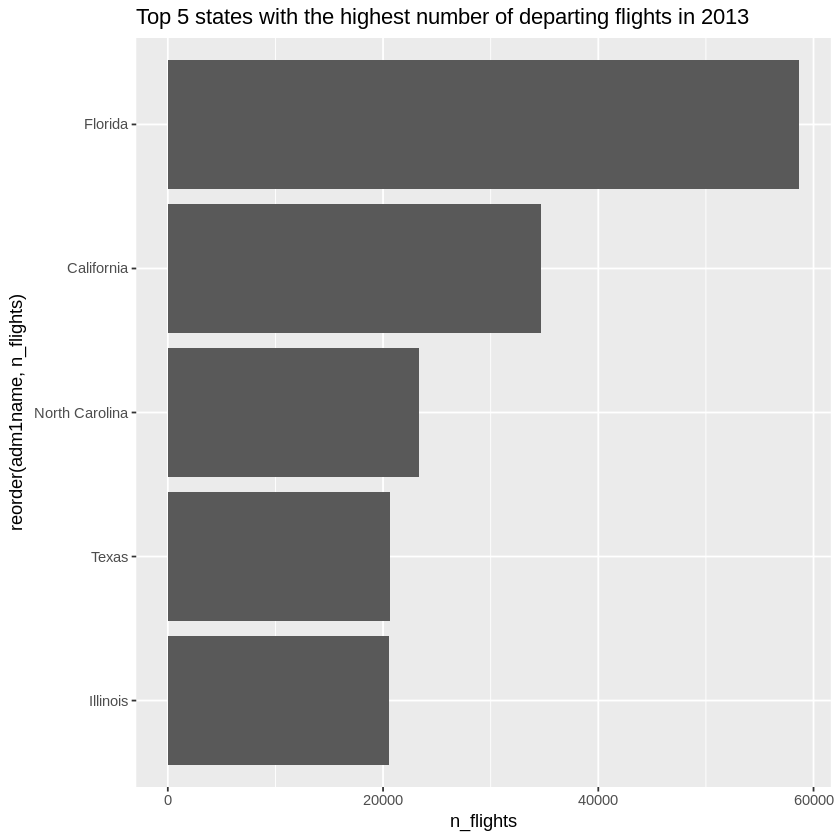

In [ ]:
## 12. (ฺHorizontal Bar Plot) จำนวนเที่ยวบินที่บินไปแต่ละที่ ว่าปี 2013 สนามบิน EWR(NJ), JFK(NY), LGA(NY) บินไปไหนมากที่สุดเรียงจากน้อยไปมาก

visualize_data13 <- prep_n_flights13 |>
  select(adm1name, n_flights) |> # ดึงคอลัมน์ ชื่อรัฐ และจำนวนไฟต์ที่่บินไปยังสนามบินปลายทาง ปี 2013
  group_by(adm1name) |> # จัดกลุ่มตามรัฐ
  summarise(n_flights = sum(n_flights)) |> # โดยการคำนวณผลรวมจำนวนเที่ยวบินที่บินไปถึงในแต่ละรัฐ
  arrange(- n_flights) |> # แล้วเรียงลำดับจำนวนผลรวมของเที่ยวบินที่บินไปถึงในแต่ละรัฐ ด้วยการเรียงลำดับจากมากไปน้อย
  slice_head(n = 5) |> # ตัดเหลือแค่ Top 5 States ที่คนนิยมบินไปมากที่สุด
  ggplot(aes(x = reorder(adm1name,  n_flights), y = n_flights)) + # ใช้ reorder() เพื่อเรียงชื่อ States (adm1name) ตามจำนวนเที่ยวบิน (n_flights), ค่า y คือจำนวนเที่ยวบิน
  geom_col() + # ใช้สร้างกราฟแท่งโดยกำหนด ความสูงของแท่งจากข้อมูล (ต่างจาก geom_bar() ที่ใช้ count โดยอัตโนมัติ)
  coord_flip() + # สลับแกน X กับ Y ทำให้ได้ กราฟแท่งแนวนอน (แทนที่จะเป็นแนวตั้ง)
  labs(
      title = "Top 5 states with the highest number of departing flights in 2013"
  )

styled_note("Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2013")
visualize_data13


Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2023

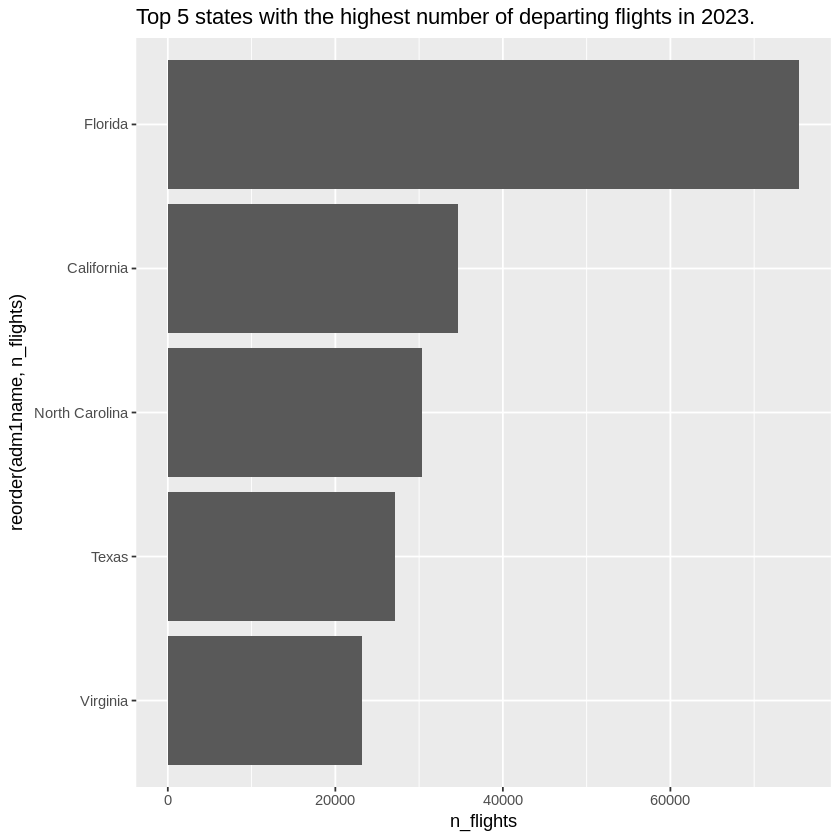

In [ ]:
## 13. (ฺHorizontal Bar Plot) นับจำนวนเที่ยวบินที่บินไปแต่ละที่ ว่าปี 2023 สนามบิน EWR(NJ), JFK(NY), LGA(NY) บินไปไหนมากที่สุดเรียงจากน้อยไปมาก
visualize_data23 <- prep_n_flights23 |>
  select(adm1name, n_flights) |> # ดึงคอลัมน์ ชื่อรัฐ และจำนวนไฟต์ที่่บินไปยังสนามบินปลายทาง ปี 2013
  group_by(adm1name) |> # จัดกลุ่มตามรัฐ
  summarise(n_flights = sum(n_flights)) |> # โดยการคำนวณผลรวมจำนวนเที่ยวบินที่บินไปถึงในแต่ละรัฐ
  arrange(- n_flights) |> # แล้วเรียงลำดับจำนวนผลรวมของเที่ยวบินที่บินไปถึงในแต่ละรัฐ ด้วยการเรียงลำดับจากมากไปน้อย
  slice_head(n = 5) |> # ตัดเหลือแค่ Top 5 States ที่คนนิยมบินไปมากที่สุด
  ggplot(aes(x = reorder(adm1name,  n_flights), y = n_flights)) + # ใช้ reorder() เพื่อเรียงชื่อ States (adm1name) ตามจำนวนเที่ยวบิน (n_flights), ค่า y คือจำนวนเที่ยวบิน
  geom_col() + # ใช้สร้างกราฟแท่งโดยกำหนด ความสูงของแท่งจากข้อมูล (ต่างจาก geom_bar() ที่ใช้ count โดยอัตโนมัติ)
  coord_flip() + # สลับแกน X กับ Y ทำให้ได้ กราฟแท่งแนวนอน (แทนที่จะเป็นแนวตั้ง)
  labs(
      title = "Top 5 states with the highest number of departing flights in 2023."
  )
styled_note("Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2023")
visualize_data23


### ⭐️ Conclusion..people go to?

```
สรุป จำนวนเที่ยวบินทั้งหมดที่คนนิยมไป Top 5 States
  - ปี 2013 Florida, California, North Carolina, Texas, 📍Illinois ตามลำดับ
  - ปี 2023  Florida, California, North Carolina, Texas, 📍Virginia ตามลำดับ

ลำดับจะเหมือนเดิมกันหมด ยกเว้นลำดับที่ 5 ที่เดิมที 2013 คือรัฐ Illinois แต่ในปี 2023 เป็นรัฐ 📍Virginia

ดังนั้น การเลือกเดินทางของเราอาจจะไปที่ Florida กัน ❗️

```

Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2013

adm1name,n_flights
<chr>,<int>
Florida,58677
California,34688
North Carolina,23304
Texas,20626
Illinois,20591


Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2023

adm1name,n_flights
<chr>,<int>
Florida,75388
California,34685
North Carolina,30388
Texas,27080
Virginia,23208


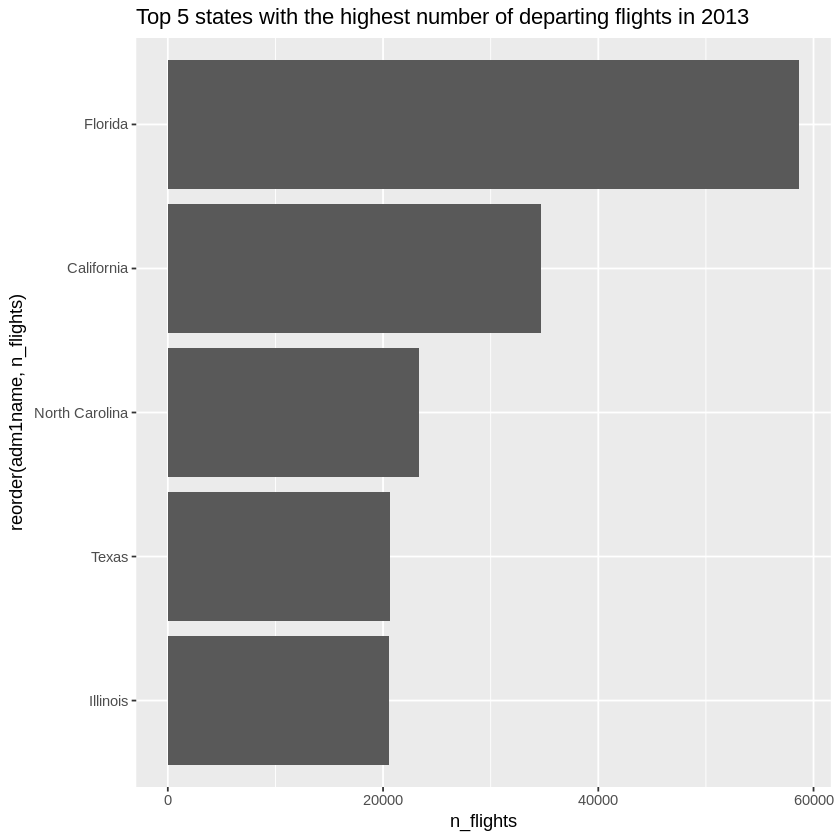

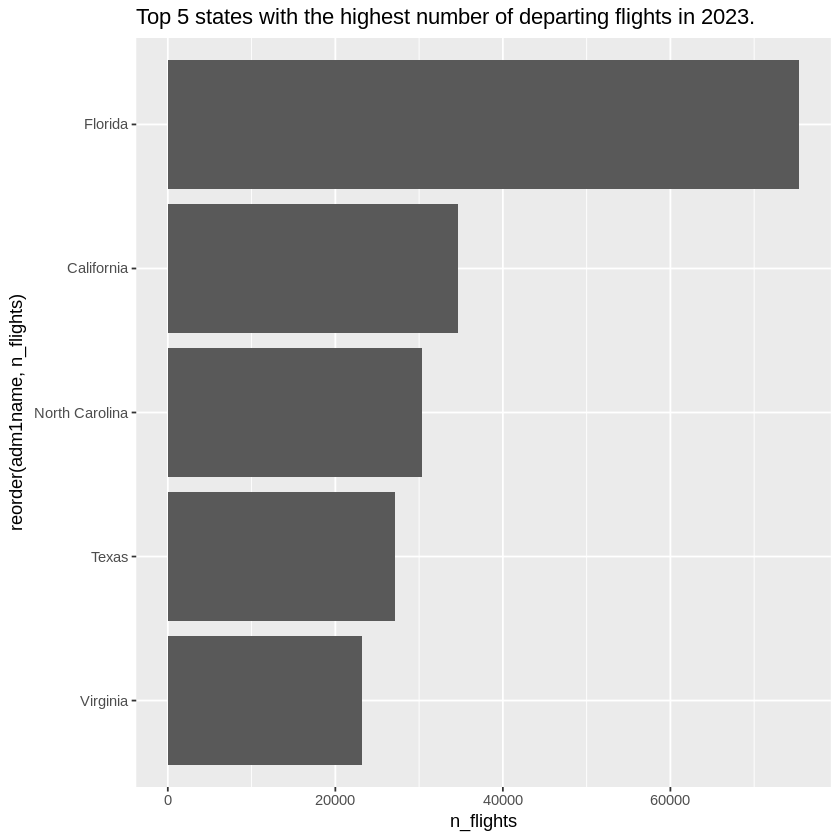

In [ ]:
styled_note("Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2013")
summaries_data13
visualize_data13
styled_note("Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2023")
summaries_data23
visualize_data23

## 2. When is the best month to fly?

อยากทราบว่า `ถ้าไปรัฐ Florida จะไปช่วงเดือนไหน` ที่คนดูเป็น High Season ในช่วง`ปี 2013 และ 2023`

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Top 5 เดือนที่คนนิยมไปมากที่สุดในปี 2013

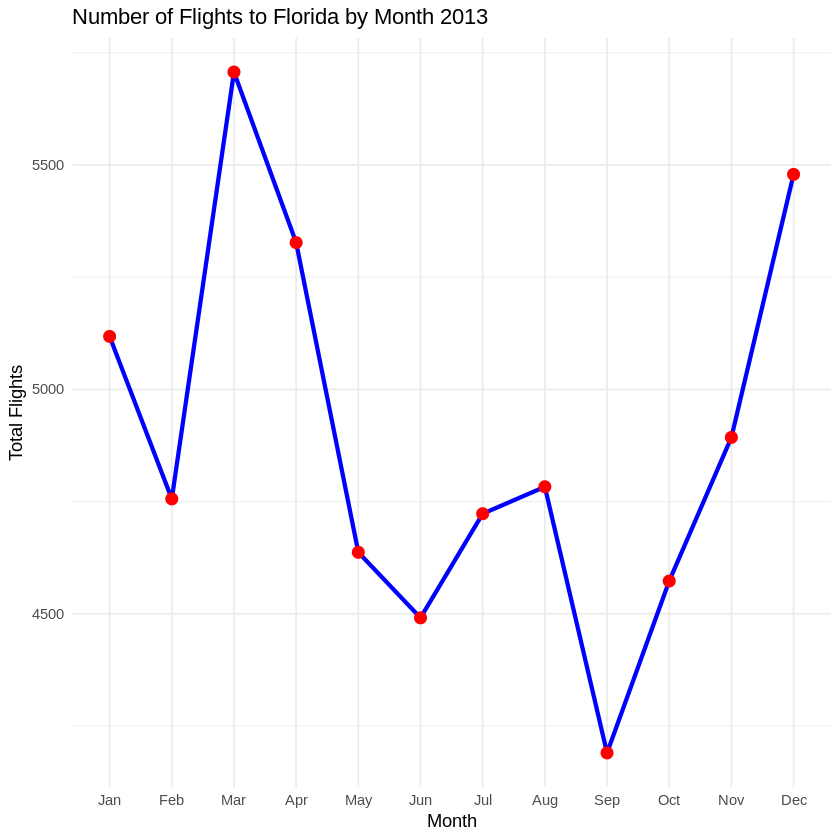

In [ ]:
season_travel_flights13 <- flights13 |>
    left_join(state13, by = c("dest" = "faa")) |>
    mutate( # ณ ตัวอย่างนี้เราจะจัดการ NA อยู๋ 2 คอลัมน์
    adm1name = case_when(
      is.na(adm1name) & dest == "STT" ~ "U.S. Virgin Islands", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ STT ให้ใส่ชื่อรัฐ U.S. Virgin Islands เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "BQN" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ BQN ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "SJU" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ SJU ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "PSE" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ PSE ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      TRUE ~ adm1name # ถ้าไม่เข้าเงื่อนไขใด ๆ ข้างบนเลย ให้ใช้ค่าจาก adm1name เดิม ไม่ต้องเปลี่ยนแปลง
    ),
    airport_name = case_when(
      is.na(airport_name) & dest == "STT" ~ "Cyril E. King Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ STT ให้ใส่ชื่อสนามบิน Cyril E. King Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "BQN" ~ "Rafael Hernández Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ BQN ให้ใส่ชื่อสนามบิน Rafael Hernández Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "SJU" ~ "Luis Muñoz Marín International Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ SJU ให้ใส่ชื่อสนามบิน Luis Muñoz Marín International Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "PSE" ~ "Mercedita Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ PSE ให้ใส่ชื่อสนามบิน Mercedita Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      TRUE ~ airport_name # ถ้าไม่เข้าเงื่อนไขใด ๆ ข้างบนเลย ให้ใช้ค่าจาก adm1name เดิม ไม่ต้องเปลี่ยนแปลง
    )
  ) |>
    filter(adm1name == "Florida") |> # กรองเฉพาะรัฐ Florida
    mutate(month = month(time_hour, label = TRUE)) |> # ดึงเฉพาะแค่เดือน จากคอลัมน์ time_hour แล้วแปลงค่าเป็น Jan, Feb, .., Dec แทนที่จะแสดงผลเป็นตัวเลขด้วย label = TRUE
    group_by(month) |> # จัดกลุ่มตามเดือน
    summarise(total_flights = n()) |> # นับจำนวนเที่ยวบิน
    ggplot(aes(x = month, y = total_flights, group = 1)) + # กำหนดแกนนอนเป็น เดือน และแกนตั้งเป็นจำนวนเที่ยวบินทั้งหมด และ group = 1 ให้ข้อมูลทั้งหมดเป็นกลุ่มเดียวกัน (จำเป็นกับกราฟเส้น) ถ้าเป็น  geom_bar() ที่ไม่ต้องการเส้นต่อจุด ก็สามารถละ group ได้ครับ
    geom_line(color = "blue", size = 1.2) + # ปรับเส้นเป็นสีน้ำเงิน ขนาด 1.2
    geom_point(color = "red", size = 3) + # ปรับ point เป็นสีแดง ขนาด 3
    labs(
      title = "Number of Flights to Florida by Month 2013", # เพิ่มชื่อหัวข้อเรื่อง Chart
      x = "Month", # label ของแกน X
      y = "Total Flights" # label ของแกน Y
    ) +
    theme_minimal() # ปรับให้ดู มินิมอล(เน้นสบายตาโล่งๆ)
styled_note("Top 5 เดือนที่คนนิยมไปมากที่สุดในปี 2013")
season_travel_flights13 # แสดงผล


Top 5 เดือนที่คนนิยมไปมากที่สุดในปี 2023

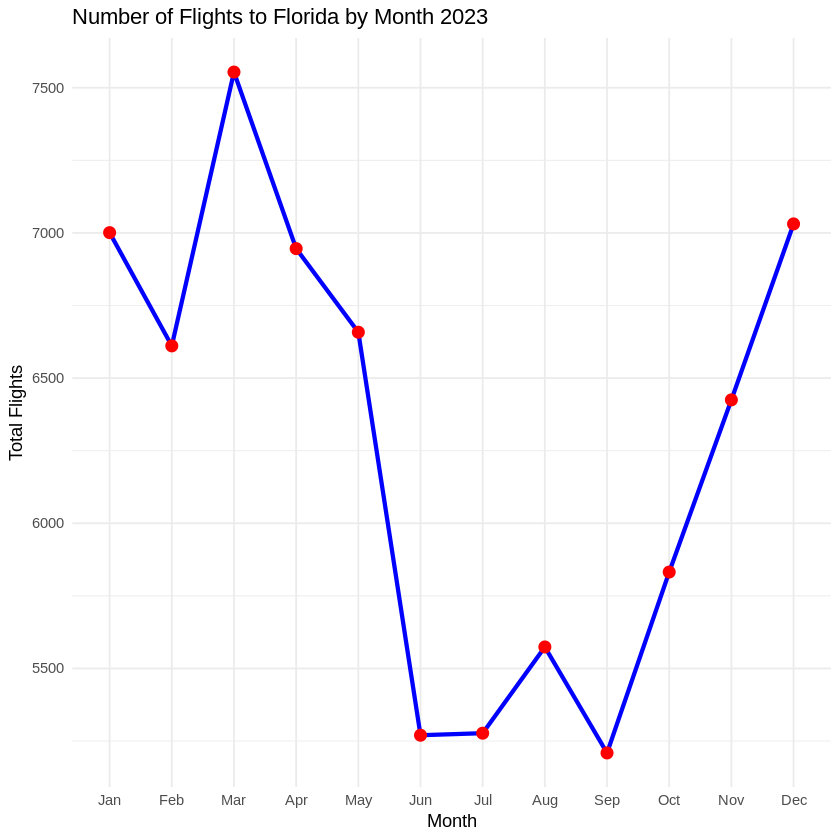

In [ ]:
season_travel_flights23 <- flights23 |>
    left_join(state23, by = c("dest" = "faa")) |>
    mutate( # ณ ตัวอย่างนี้เราจะจัดการ NA อยู๋ 2 คอลัมน์
    adm1name = case_when(
      is.na(adm1name) & dest == "STT" ~ "U.S. Virgin Islands", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ STT ให้ใส่ชื่อรัฐ U.S. Virgin Islands เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "BQN" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ BQN ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "SJU" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ SJU ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      is.na(adm1name) & dest == "PSE" ~ "Puerto Rico", # เมื่อชื่อรัฐ (adm1name) คือ NA และ สนามบินลปายทาง (dest) คือ PSE ให้ใส่ชื่อรัฐ Puerto Rico เข้าไปแทน NA ในคอลัมน์ adm1name
      TRUE ~ adm1name # ถ้าไม่เข้าเงื่อนไขใด ๆ ข้างบนเลย ให้ใช้ค่าจาก adm1name เดิม ไม่ต้องเปลี่ยนแปลง
    ),
    airport_name = case_when(
      is.na(airport_name) & dest == "STT" ~ "Cyril E. King Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ STT ให้ใส่ชื่อสนามบิน Cyril E. King Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "BQN" ~ "Rafael Hernández Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ BQN ให้ใส่ชื่อสนามบิน Rafael Hernández Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "SJU" ~ "Luis Muñoz Marín International Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ SJU ให้ใส่ชื่อสนามบิน Luis Muñoz Marín International Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      is.na(airport_name) & dest == "PSE" ~ "Mercedita Airport", # เมื่อชื่อสนามบิน (airport_name) คือ NA และ สนามบินลปายทาง (dest) คือ PSE ให้ใส่ชื่อสนามบิน Mercedita Airport เข้าไปแทน NA ในคอลัมน์ airport_name
      TRUE ~ airport_name # ถ้าไม่เข้าเงื่อนไขใด ๆ ข้างบนเลย ให้ใช้ค่าจาก adm1name เดิม ไม่ต้องเปลี่ยนแปลง
    )
  ) |>
    filter(adm1name == "Florida") |> # กรองเฉพาะรัฐ Florida
    mutate(month = month(time_hour, label = TRUE)) |> # ดึงเฉพาะแค่เดือน จากคอลัมน์ time_hour แล้วแปลงค่าเป็น Jan, Feb, .., Dec แทนที่จะแสดงผลเป็นตัวเลขด้วย label = TRUE
    group_by(month) |> # จัดกลุ่มตามเดือน
    summarise(total_flights = n()) |> # นับจำนวนเที่ยวบิน
    ggplot(aes(x = month, y = total_flights, group = 1)) + # กำหนดแกนนอนเป็น เดือน และแกนตั้งเป็นจำนวนเที่ยวบินทั้งหมด และ group = 1 ให้ข้อมูลทั้งหมดเป็นกลุ่มเดียวกัน (จำเป็นกับกราฟเส้น) ถ้าเป็น  geom_bar() ที่ไม่ต้องการเส้นต่อจุด ก็สามารถละ group ได้ครับ
    geom_line(color = "blue", size = 1.2) + # ปรับเส้นเป็นสีน้ำเงิน ขนาด 1.2
    geom_point(color = "red", size = 3) + # ปรับ point เป็นสีแดง ขนาด 3
    labs(
      title = "Number of Flights to Florida by Month 2023", # เพิ่มชื่อหัวข้อเรื่อง Chart
      x = "Month", # label ของแกน X
      y = "Total Flights" # label ของแกน Y
    ) +
    theme_minimal() # ปรับให้ดู มินิมอล(เน้นสบายตาโล่งๆ)
styled_note("Top 5 เดือนที่คนนิยมไปมากที่สุดในปี 2023")
season_travel_flights23 # แสดงผล


### ⭐️ Conclusion..month travel?

```
สรุป จำนวนเที่ยวบินทั้งหมดที่คนนิยมไป Top 4 Months
  - ปี 2013 Mar, Dec, Apr, Jan ตามลำดับ
  - ปี 2023 Mar, Dec, Jan, Apr ตามลำดับ

ลำดับจะเหมือนเดิมกันหมด ยกเว้นลำดับที่ 4 ที่สลับลำดับกัน 3 เป็น 4 ตามปี
หมายเหตุ จะเห็นได้ว่าในปี 2023 ลำดับที่ 2, 3, 4 แทบจะไม่แตกต่างกันอย่างมีนัยยะสำคัญเลย

ดังนั้น การเลือกเดินทางของเราอาจจะไปที่ ⭐️ Florida เราอาจจะมีหลายแผน ❗️
แผน A ไปเดือน ⭐️ March นี้แหละ (best case) เพราะคนนิยมไปกัน
แผน B, C, .. ต่อไปก็พิจารณาจากเดือนลำดับถัดๆไป

```

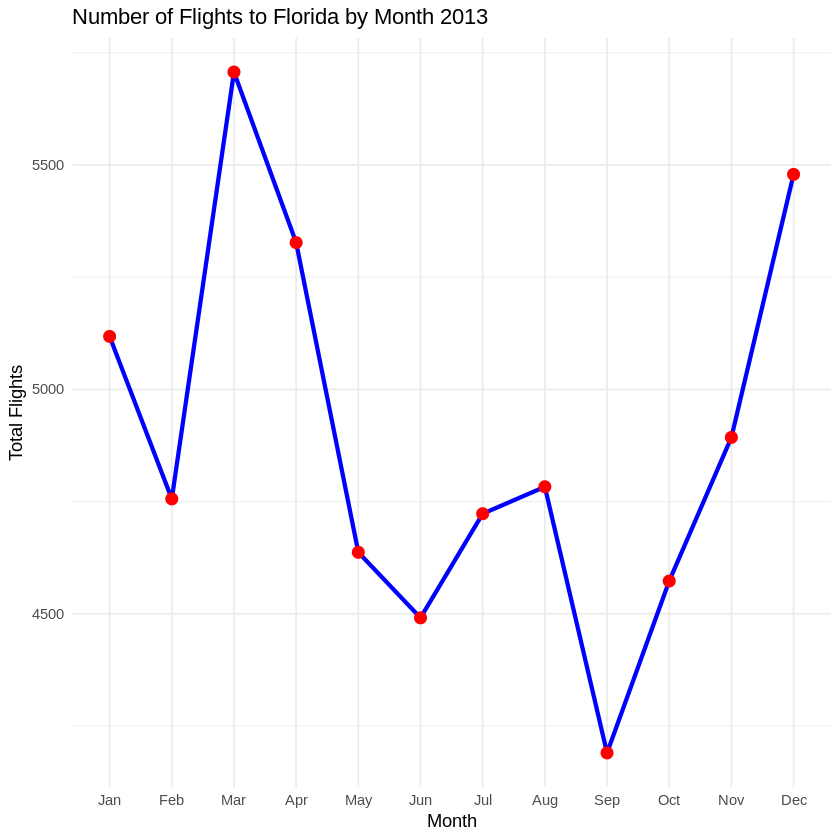

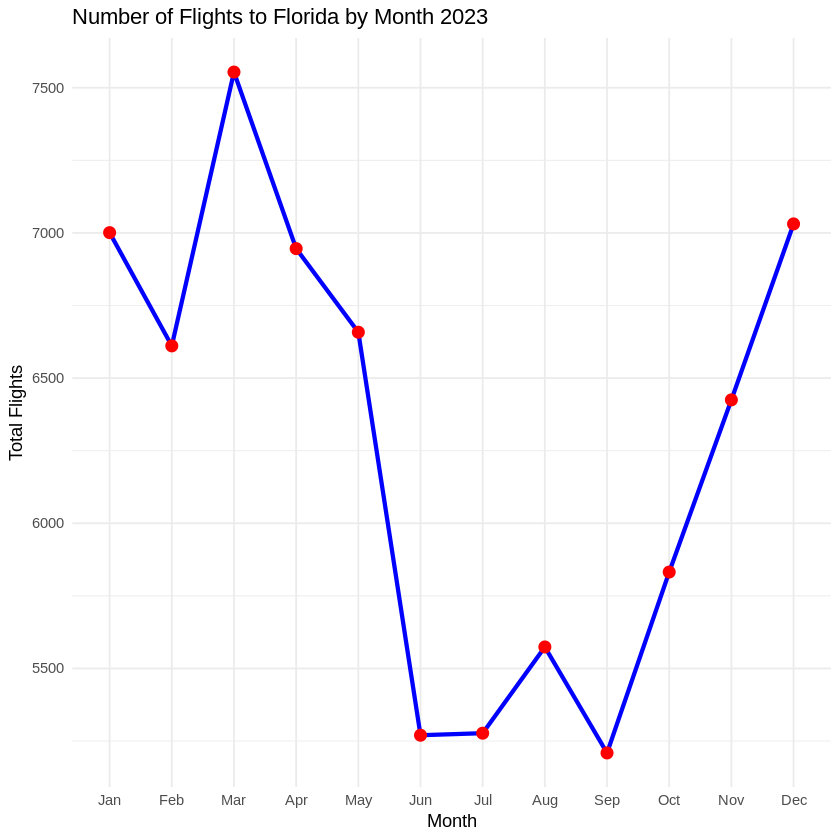

In [ ]:
season_travel_flights13 # trend line จำนวนเที่ยวบินในแต่ละเดือนในปี 2013
season_travel_flights23 # trend line จำนวนเที่ยวบินในแต่ละเดือนในปี 2023

## 3. Which airline is the best?

สายการบินที่ดีที่สุด (ตามเงื่อนไขที่เรากำหนด)


❗️**จัดลำดับความสำคัญ เงื่อนไขที่เราต้องการมากที่สุด ตามลำดับ**

```
1. ไฟต์ดีเลย์ น้อยขาออก + ถึงก่อนเวลา (best)
2. ใช้เวลาบินน้อยสุด + ระยะเวลาบินต่อเที่ยวบิน ใน 1 ปี
3. เราต้องมาถึงสนามบินอย่างน้อย 3 ชม.
  (เพื่อเวลา Check-in, ทานข้าว, เวลาฉุกเฉินเร่งด่วน เพราะ บางสายการบิน มีการออกก่อนเวลา 2 ชม กว่าๆ)
```

In [ ]:
# หาสายการบินที่ดีที่สุด 2013
# นำตารางเที่ยวบิน flights13 เป็นตัวตั้งและ left join เข้ากับตารางสายการบิน (airlines13) เชื่อมด้วยรหัสสายการบิน (carrier)
# (ต่อ) นำตารางที่ join กันเมื่อสักครู่เป็นตัวตั้ง left join เข้ากับตารางตารางรัฐที่จะบินไป (state13) เชื่อมด้วยรหัสสายการบิน (เชื่อมด้วยตัวย่อสนามบินปลายทาง)
the_best_airlines_2013 <- flights13 |>
  left_join(airlines13, by = "carrier") |>
  left_join(state13, by = c("dest" = "faa")) |>
  filter(adm1name == "Florida") |> # กรองเฉพาะรัฐ Florida
  select(name, adm1name, dep_delay, arr_delay, air_time) |> # ดึงชื่อสายการบิน(name), ชื่อรัฐ(ad1name), เวลาขาออกล่าช้า(dep_delay)นาที, เวลาขาเข้าล่าช้า(arr_delay)นาที, เวลาระหว่างบิน(airtime)นาที
  select(-adm1name) |> # ดึงทุกคอลัมน์ยกเว้น ชื่อรัฐ(ad1name) เหลือ name, dep_delay, arr_delay, air_time
  mutate(time_delay = (dep_delay + arr_delay)) |> # ระยะเวลาการเดินทางที่ล่าช้าขาเข้า-ขาออก ทั้งหมด
  select(-dep_delay, -arr_delay) |> # ดึงทุกคอลัมน์ยกเว้น ชื่อรัฐ(ad1name) เหลือ name, air_time, time_delay
  arrange(time_delay) |> # เรียงลำดับค่าน้อยไปมาก
  group_by(name) |> # จัดกลุ่มตามชื่อสายการบิน
  summarise(time_delay = sum(time_delay), # คำนวณผลรวมระยะเวลาบินล่าช้าในแต่ละสายการบิน
            air_time = sum(air_time), # คำนวณผลรวมระยะเวลาการเดินทาง
            n_flights = n()) |> # คำนวณจำนวนเที่ยวบิน
  mutate(time_delay_per_flight = round(time_delay / n_flights), # ระยะเวลาออกเดินทางล่าช้า ต่อ เที่ยวบิน
         air_time_per_flight = round(air_time / n_flights) # ระยะเวลาการบิน ต่อ เที่ยวบิน
        ) |>
  select(name, time_delay_per_flight, air_time_per_flight) |> # ดึงคอลัมน์ 3 คอลัมน์ ชื่อสายการบิน(name), ระยะเวลาขาออก-ขาเข้าล่าช้าต่อเที่ยวบิน, ระยะเวลาเดินทางต่อเที่ยวบิน
  arrange(time_delay_per_flight, air_time_per_flight) # เรียงลำดับค่าน้อยไปมากของ time_delay_per_flight ก่อน จากนั้นค่อยเรียง air_time_per_flight

styled_note("ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2013")
the_best_airlines_2013


ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2013

name,time_delay_per_flight,air_time_per_flight
<chr>,<dbl>,<dbl>
American Airlines Inc.,5,151
Envoy Air,10,144
Delta Air Lines Inc.,11,147
United Air Lines Inc.,14,146
Endeavor Air Inc.,24,128
JetBlue Airways,25,144
ExpressJet Airlines Inc.,34,123


In [ ]:
# หาสายการบินที่ดีที่สุด 2023
# นำตารางเที่ยวบิน flights23 เป็นตัวตั้งและ left join เข้ากับตารางสายการบิน (airlines23) เชื่อมด้วยรหัสสายการบิน (carrier)
# (ต่อ) นำตารางที่ join กันเมื่อสักครู่เป็นตัวตั้ง left join เข้ากับตารางตารางรัฐที่จะบินไป (state23) เชื่อมด้วยรหัสสายการบิน (เชื่อมด้วยตัวย่อสนามบินปลายทาง)
the_best_airlines_2023 <- flights23 |>
  left_join(airlines23, by = "carrier") |>
  left_join(state23, by = c("dest" = "faa")) |>
  filter(adm1name == "Florida") |> # กรองเฉพาะรัฐ Florida
  select(name, adm1name, dep_delay, arr_delay, air_time) |> # ดึงชื่อสายการบิน(name), ชื่อรัฐ(ad1name), เวลาขาออกล่าช้า(dep_delay)นาที, เวลาขาเข้าล่าช้า(arr_delay)นาที, เวลาระหว่างบิน(airtime)นาที
  select(-adm1name) |> # ดึงทุกคอลัมน์ยกเว้น ชื่อรัฐ(ad1name) เหลือ name, dep_delay, arr_delay, air_time
  mutate(time_delay = (dep_delay + arr_delay)) |> # ระยะเวลาการเดินทางที่ล่าช้าขาเข้า-ขาออก ทั้งหมด
  select(-dep_delay, -arr_delay) |> # ดึงทุกคอลัมน์ยกเว้น ชื่อรัฐ(ad1name) เหลือ name, air_time, time_delay
  arrange(time_delay) |> # เรียงลำดับค่าน้อยไปมาก
  group_by(name) |> # จัดกลุ่มตามชื่อสายการบิน
  summarise(time_delay = sum(time_delay), # คำนวณผลรวมระยะเวลาบินล่าช้าในแต่ละสายการบิน
            air_time = sum(air_time), # คำนวณผลรวมระยะเวลาการเดินทาง
            n_flights = n()) |> # คำนวณจำนวนเที่ยวบิน
  mutate(time_delay_per_flight = round(time_delay / n_flights), # ระยะเวลาออกเดินทางล่าช้า ต่อ เที่ยวบิน
         air_time_per_flight = round(air_time / n_flights) # ระยะเวลาการบิน ต่อ เที่ยวบิน
        ) |>
  select(name, time_delay_per_flight, air_time_per_flight) |> # ดึงคอลัมน์ 3 คอลัมน์ ชื่อสายการบิน(name), ระยะเวลาขาออก-ขาเข้าล่าช้าต่อเที่ยวบิน, ระยะเวลาเดินทางต่อเที่ยวบิน
  arrange(time_delay_per_flight, air_time_per_flight) # เรียงลำดับค่าน้อยไปมากของ time_delay_per_flight ก่อน จากนั้นค่อยเรียง air_time_per_flight

styled_note("ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2023")
the_best_airlines_2023


ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2023

name,time_delay_per_flight,air_time_per_flight
<chr>,<dbl>,<dbl>
Allegiant Air,-7,140
Republic Airline,-2,150
Endeavor Air Inc.,7,124
American Airlines Inc.,19,154
Delta Air Lines Inc.,20,146
United Air Lines Inc.,28,144
Spirit Air Lines,32,145
Envoy Air,34,156
JetBlue Airways,45,145


### ⭐️ Conclusion.. Airlines?

```
สรุป จาก 3 สนามบิน EWR(NJ), JFK(NY), LGA(NY) ที่บินไป florida มี Top 4 สายการบินที่บินไปในแต่ละปี
  - ปี 2013 American Airlines Inc., Envoy Air, Delta Air Lines Inc., United Air Lines Inc. ตามลำดับ
  - ปี 2023 Allegiant Air, Republic Airline, Endeavor Air Inc., American Airlines Inc. ตามลำดับ

ดูเหมือนจะมีแค่ American Airlines Inc. ที่ติด Top 4

ดังนั้น การเลือกเดินทางของเราอาจจะไปที่ ⭐️ Florida ช่วงเดือน 3 เราอาจจะมีหลายแผนอีกเช่นเดิม ❗️

แผน A เลือกสายการบิน Allegiant Air (best เพราะข้อมูลดูใหม่สุดและเข้าเงื่อนไขมากที่สุด)
แผน B, C, .. ต่อไปก็พิจารณาจากเดือนลำดับถัดๆไป

```

In [ ]:
styled_note("ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2013")
the_best_airlines_2013 # ตารางแสดงรายละเอียดเวลาบิน 2013

styled_note("ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2023")
the_best_airlines_2023 # ตารางแสดงรายละเอียดเวลาบิน 2023


ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2013

name,time_delay_per_flight,air_time_per_flight
<chr>,<dbl>,<dbl>
American Airlines Inc.,5,151
Envoy Air,10,144
Delta Air Lines Inc.,11,147
United Air Lines Inc.,14,146
Endeavor Air Inc.,24,128
JetBlue Airways,25,144
ExpressJet Airlines Inc.,34,123


ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2023

name,time_delay_per_flight,air_time_per_flight
<chr>,<dbl>,<dbl>
Allegiant Air,-7,140
Republic Airline,-2,150
Endeavor Air Inc.,7,124
American Airlines Inc.,19,154
Delta Air Lines Inc.,20,146
United Air Lines Inc.,28,144
Spirit Air Lines,32,145
Envoy Air,34,156
JetBlue Airways,45,145


## 4. What is the best flight time to choose?


สภาพอากาศที่เหมาะสมที่สุด

- พิจารณาจากสนามบิน (หลักๆ 3 ที่ `EWR(NJ`), `JFK(NY`), `LGA(NY)`)
- ออกเดินทาง `ช่วงเวลากี่โมง`

#### 4.1 Alert NA (Join)

In [ ]:
# นำตาราง flight13 เป็นตัวตั้งและ Letf Join ด้วยตาราง weather13 เชื่อมด้วย origin, year, month, day, hour
styled_note("พบ NA หลัง Join Table ในปี 2013 ภายในคอลัมน์ต่อไปนี้")
flights13 |>
  left_join(weather13, by = c("origin", "year", "month", "day", "hour")) |>
  select(where(~ any(is.na(.)))) # เลือกคอลัมน์ที่มี NA อย่างน้อย 1 แถว

# นำตาราง flight23 เป็นตัวตั้งและ Letf Join ด้วยตาราง weather13 เชื่อมด้วย origin, year, month, day, hour
styled_note("พบ NA หลัง Join Table ในปี 2023 ภายในคอลัมน์ต่อไปนี้")
flights23 |>
  left_join(weather23, by = c("origin", "year", "month", "day", "hour")) |>
  select(where(~ any(is.na(.))))# เลือกคอลัมน์ที่มี NA อย่างน้อย 1 แถว

พบ NA หลัง Join Table ในปี 2013 ภายในคอลัมน์ต่อไปนี้

...1.y,precip,visib,time_hour.y
<dbl>,<dbl>,<dbl>,<dttm>
5,0,10,2013-01-01 05:00:00
17414,0,10,2013-01-01 05:00:00
8708,0,10,2013-01-01 05:00:00
8708,0,10,2013-01-01 05:00:00
17415,0,10,2013-01-01 06:00:00
5,0,10,2013-01-01 05:00:00
6,0,10,2013-01-01 06:00:00
17415,0,10,2013-01-01 06:00:00
8709,0,10,2013-01-01 06:00:00


พบ NA หลัง Join Table ในปี 2023 ภายในคอลัมน์ต่อไปนี้

...1.y,precip,time_hour.y
<dbl>,<dbl>,<dttm>
17492,0e+00,2023-01-01 20:00:00
24,0e+00,2023-01-01 23:00:00
24,0e+00,2023-01-01 23:00:00
22,0e+00,2023-01-01 21:00:00
17492,0e+00,2023-01-01 20:00:00
17477,1e-04,2023-01-01 05:00:00
6,1e-04,2023-01-01 05:00:00
17477,1e-04,2023-01-01 05:00:00
17477,1e-04,2023-01-01 05:00:00


#### 4.2 Cleaning Data

In [ ]:
# นำตาราง flight13 เป็นตัวตั้งและ Letf Join ด้วยตาราง weather13 เชื่อมด้วย origin, year, month, day, hour
styled_note("ตัดแถวที่มีค่า NA ออก ในปี 2013")
flights_weather_clean_2013 <- flights13 |>
  left_join(weather13, by = c("origin", "year", "month", "day", "hour")) |>
  filter(if_all(everything(), ~ !is.na(.))) # กรองเฉพาะแถวที่ไม่มี NA เลย
flights_weather_clean_2013 # ข้อมูลพร้อมใช้งาน

styled_note("ตัดแถวที่มีค่า NA ออก ในปี 2023")
flights_weather_clean_2023 <- flights23 |>
  left_join(weather23, by = c("origin", "year", "month", "day", "hour")) |>
  filter(if_all(everything(), ~ !is.na(.)))  # กรองเฉพาะแถวที่ไม่มี NA เลย
flights_weather_clean_2023 # ข้อมูลพร้อมใช้งาน

ตัดแถวที่มีค่า NA ออก ในปี 2013

...1.x,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,⋯,dest,air_time,distance,hour,minute,time_hour.x,...1.y,precip,visib,time_hour.y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dttm>
1,2013,1,1,517,515,2,830,819,11,⋯,IAH,227,1400,5,15,2013-01-01 05:00:00,5,0,10,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,⋯,IAH,227,1416,5,29,2013-01-01 05:00:00,17414,0,10,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,⋯,MIA,160,1089,5,40,2013-01-01 05:00:00,8708,0,10,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,⋯,BQN,183,1576,5,45,2013-01-01 05:00:00,8708,0,10,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,⋯,ATL,116,762,6,0,2013-01-01 06:00:00,17415,0,10,2013-01-01 06:00:00
6,2013,1,1,554,558,-4,740,728,12,⋯,ORD,150,719,5,58,2013-01-01 05:00:00,5,0,10,2013-01-01 05:00:00
7,2013,1,1,555,600,-5,913,854,19,⋯,FLL,158,1065,6,0,2013-01-01 06:00:00,6,0,10,2013-01-01 06:00:00
8,2013,1,1,557,600,-3,709,723,-14,⋯,IAD,53,229,6,0,2013-01-01 06:00:00,17415,0,10,2013-01-01 06:00:00
9,2013,1,1,557,600,-3,838,846,-8,⋯,MCO,140,944,6,0,2013-01-01 06:00:00,8709,0,10,2013-01-01 06:00:00


ตัดแถวที่มีค่า NA ออก ในปี 2023

...1.x,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,⋯,origin,dest,air_time,distance,hour,minute,time_hour.x,...1.y,precip,time_hour.y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dttm>
1,2023,1,1,1,2038,203,328,3,205,⋯,EWR,SMF,367,2500,20,38,2023-01-01 20:00:00,17492,0e+00,2023-01-01 20:00:00
2,2023,1,1,18,2300,78,228,135,53,⋯,JFK,ATL,108,760,23,0,2023-01-01 23:00:00,24,0e+00,2023-01-01 23:00:00
3,2023,1,1,31,2344,47,500,426,34,⋯,JFK,BQN,190,1576,23,44,2023-01-01 23:00:00,24,0e+00,2023-01-01 23:00:00
4,2023,1,1,33,2140,173,238,2352,166,⋯,JFK,CHS,108,636,21,40,2023-01-01 21:00:00,22,0e+00,2023-01-01 21:00:00
5,2023,1,1,36,2048,228,223,2252,211,⋯,EWR,DTW,80,488,20,48,2023-01-01 20:00:00,17492,0e+00,2023-01-01 20:00:00
6,2023,1,1,503,500,3,808,815,-7,⋯,EWR,MIA,154,1085,5,0,2023-01-01 05:00:00,17477,1e-04,2023-01-01 05:00:00
7,2023,1,1,520,510,10,948,949,-1,⋯,JFK,BQN,192,1576,5,10,2023-01-01 05:00:00,6,1e-04,2023-01-01 05:00:00
8,2023,1,1,524,530,-6,645,710,-25,⋯,EWR,ORD,119,719,5,30,2023-01-01 05:00:00,17477,1e-04,2023-01-01 05:00:00
9,2023,1,1,537,520,17,926,818,68,⋯,EWR,IAH,258,1400,5,20,2023-01-01 05:00:00,17477,1e-04,2023-01-01 05:00:00


#### 4.3 Check NA

In [ ]:
styled_note("ไม่พบ NA ในปี 2013 แล้ว")
flights_weather_clean_2013 |> select(where(~ any(is.na(.)))) # เลือกคอลัมน์ที่มี NA
styled_note("ไม่พบ NA ในปี 2023 แล้ว")
flights_weather_clean_2023 |> select(where(~ any(is.na(.)))) # เลือกคอลัมน์ที่มี NA

ไม่พบ NA ในปี 2013 แล้ว

Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


⋮

ไม่พบ NA ในปี 2023 แล้ว

Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


⋮

#### 4.4 Visualize Data

`summarise()` has grouped output by 'origin', 'month'. You can override using
the `.groups` argument.


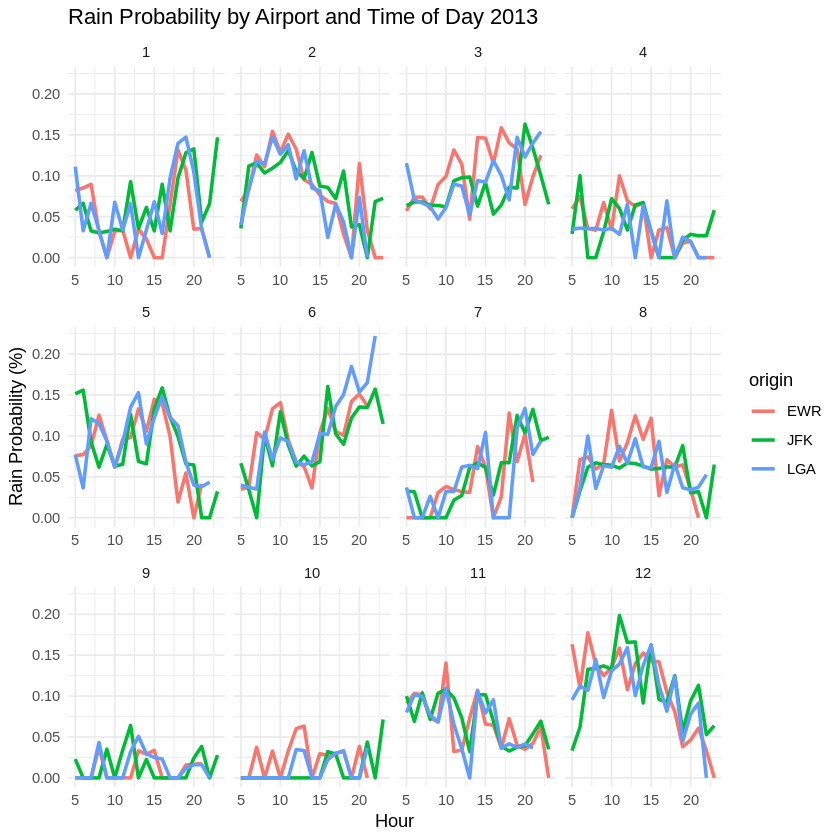

In [ ]:
# นำตารางเที่ยวบิน flights13 เป็นตัวตั้งและ Left Join weather13 เชื่อมด้วย origin, year, month, day, hour
flights_weather_2013 <- flights_weather_clean_2013 |>
  mutate(rain = ifelse(precip > 0, 1, 0)) |> # สร้างคอลัมน์ rain ถ้า precip > 1 แสดงว่าฝนตก นอกนั้นคือฝนไม่ตก
  group_by(origin, month, hour) |> # จัดกลุ่มตามสนามบินต้นทาง เดือน ชั่วโมง
  summarise(
    total_flights = n(), # จำนวนไฟต์ที่บินทั้งหมด
    rainy_flights = sum(rain), # จำนวนไฟต์ที่บินและฝนตก
    rain_prob = mean(rain) # ความน่าจะเป็นฝนตกกับจำนวนไฟต์ทั้งหมด
  ) |>
  arrange(rain_prob) |> # เรียงตามโอกาสฝนตกจากน้อยไปมาก
  # แสดงกราฟโอกาสฝนตกตามสนามบินและช่วงเวลา
  ggplot(aes(x = hour, y = rain_prob, color = origin)) + # แกน x แทนด้วยเวลาชั่วโมงที่สนามบิน, แกน y แสดงความน่าจะเป็นที่ฝนตก, แยกสีตามสนามบินต้นทาง
    geom_line(size = 1) + # ขนาดเส้นเท่ากับ 1
    # facet_wrap(~ month):
    # สร้างกราฟย่อยหลายอัน โดยแต่ละอันแทนค่าของ month ที่แตกต่างกัน
    # scales = "free_x":
    # แกน x ของแต่ละกราฟสามารถมีช่วงที่แตกต่างกัน ไม่จำเป็นต้องเท่ากันทุกกราฟ
    facet_wrap(~ month, scales = "free_x") +
    labs(
      title = "Rain Probability by Airport and Time of Day 2013", # ชื่อ canvas
      x = "Hour", # label  x
      y = "Rain Probability (%)" # label y
    ) +
  theme_minimal() # ธีมสะอาดสบายตา

flights_weather_2013

`summarise()` has grouped output by 'origin', 'month'. You can override using
the `.groups` argument.


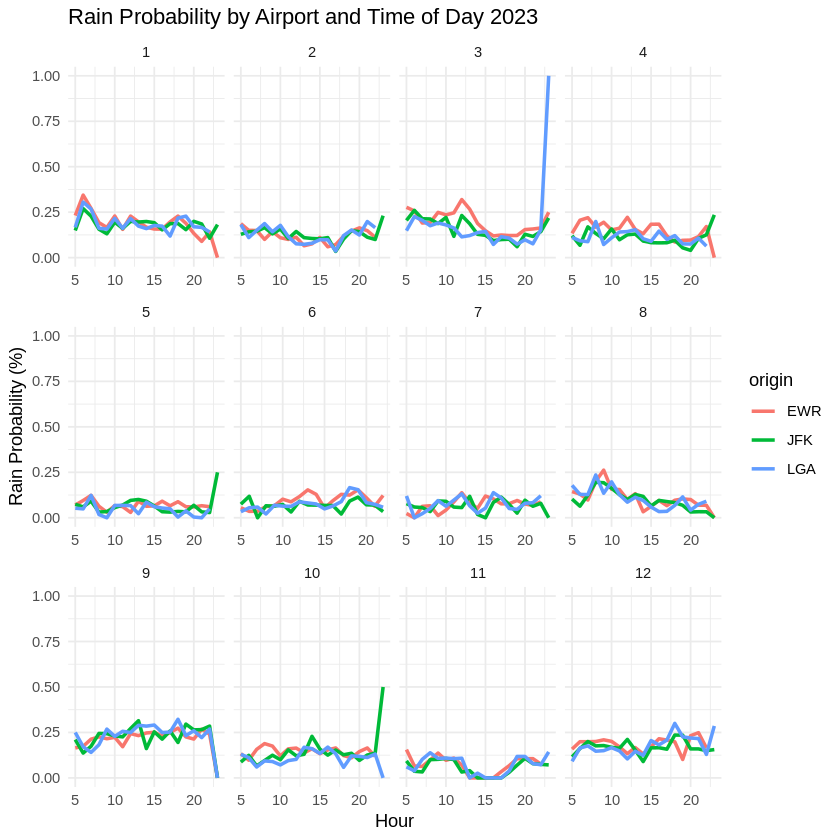

In [ ]:
# นำตารางเที่ยวบิน flights23 เป็นตัวตั้งและ Left Join weather23 เชื่อมด้วย origin, year, month, day, hour
flights_weather_2023 <- flights_weather_clean_2023 |>
  mutate(rain = ifelse(precip > 0, 1, 0)) |> # สร้างคอลัมน์ rain ถ้า precip > 1 แสดงว่าฝนตก นอกนั้นคือฝนไม่ตก
  group_by(origin, month, hour) |> # จัดกลุ่มตามสนามบินต้นทาง เดือน ชั่วโมง
  summarise(
    total_flights = n(), # จำนวนไฟต์ที่บินทั้งหมด
    rainy_flights = sum(rain), # จำนวนไฟต์ที่บินและฝนตก
    rain_prob = mean(rain) # ความน่าจะเป็นฝนตกกับจำนวนไฟต์ทั้งหมด
  ) |>
  arrange(rain_prob) |> # เรียงตามโอกาสฝนตกจากน้อยไปมาก
  # แสดงกราฟโอกาสฝนตกตามสนามบินและช่วงเวลา
  ggplot(aes(x = hour, y = rain_prob, color = origin)) + # แกน x แทนด้วยเวลาชั่วโมงที่สนามบิน, แกน y แสดงความน่าจะเป็นที่ฝนตก, แยกสีตามสนามบินต้นทาง
    geom_line(size = 1) + # ขนาดเส้นเท่ากับ 1
    # facet_wrap(~ month):
    # สร้างกราฟย่อยหลายอัน โดยแต่ละอันแทนค่าของ month ที่แตกต่างกัน
    # scales = "free_x":
    # แกน x ของแต่ละกราฟสามารถมีช่วงที่แตกต่างกัน ไม่จำเป็นต้องเท่ากันทุกกราฟ
    facet_wrap(~ month, scales = "free_x") +
    labs(
      title = "Rain Probability by Airport and Time of Day 2023", # ชื่อ canvas
      x = "Hour", # label  x
      y = "Rain Probability (%)" # label y
    ) +
  theme_minimal() # ธีมสะอาดสบายตา

flights_weather_2023

### ⭐️ Conclusion..best weather?

```
สรุป เมื่อเราเลือกไป Florida เดือน Mar สายการบิน เราจะเลือกช่วงเวลาไหน สนามบินไหน
  - ปี 2013 เน้นไปช่วงเช้า ตี 5 ถึง 10 โมงเช้าที่สายการบิน JFK(NY)(สีเขียว) เพราะช่วงเช้าจะมีฝนตกบ้างที่ LGA(NY) และ 8-10 โมงเริ่มมีฝนตกบ้างที่ EWR(NJ)
  - ปี 2023 เน้นไปช่วงเช้า ตี 5 ถึง 10 โมงเช้าที่สายการบินไหนก็ได้ EWR(NJ), JFK(NY), LGA(NY)

ดังนั้น การเลือกเดินทางของเราอาจจะไปที่ ⭐️ JFK(NY)(สีเขียว) ช่วงเวลาตี 5 ถึง 10 โมง ❗️

```

Line Chart ย่อยแสดงความสัมพันธ์เวลาชั่วโมง เทียบกับ ความน่าเป็นที่ฝนตก ในแต่ละช่วงเดือน 2013,2023

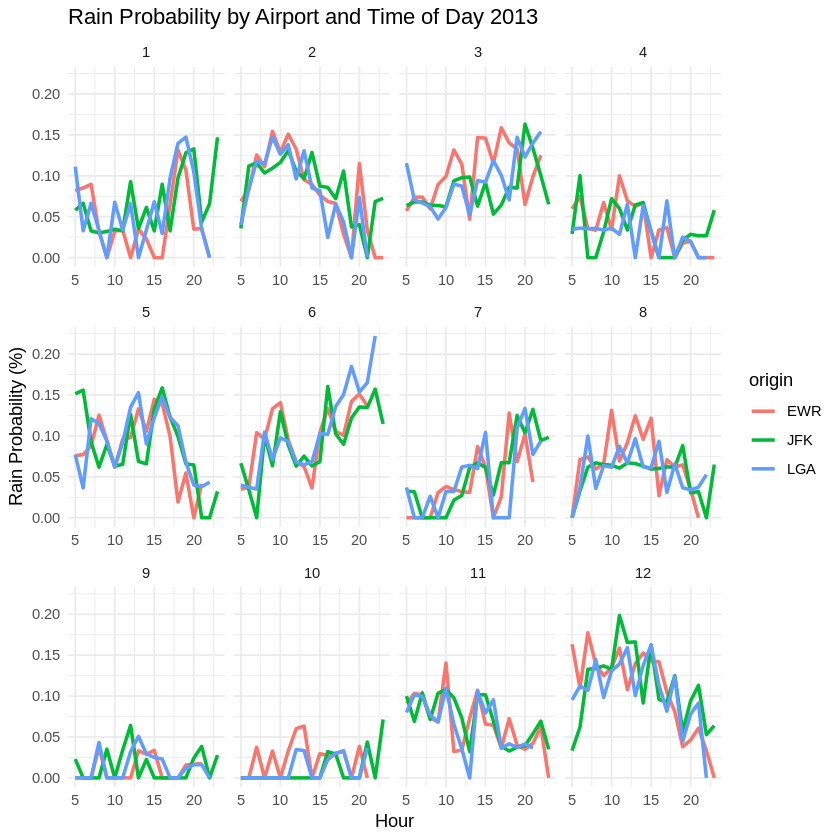

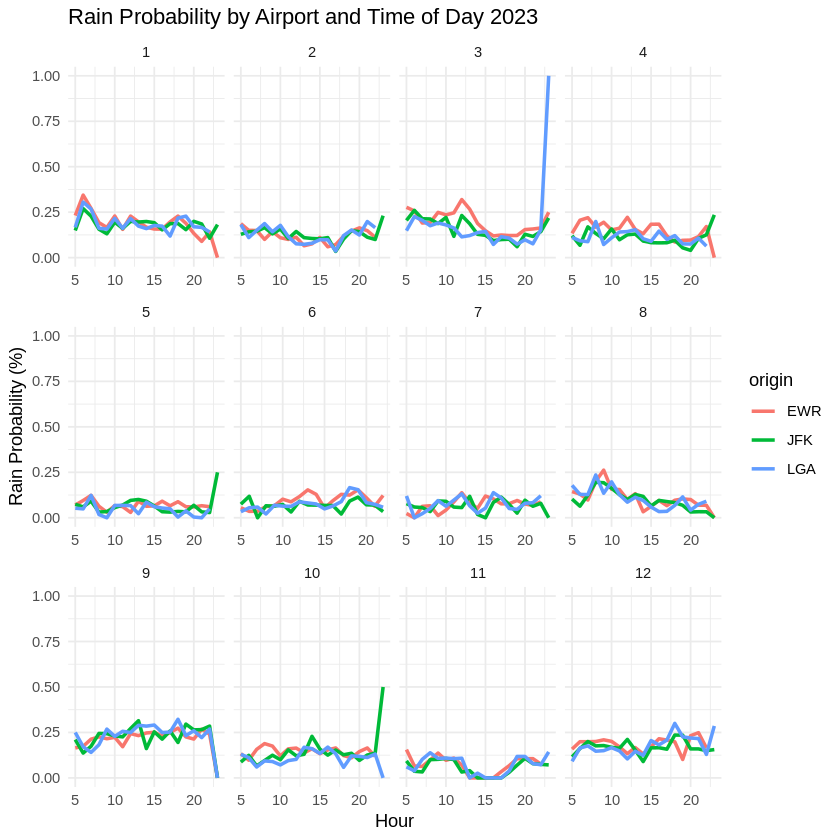

In [ ]:
styled_note("Line Chart ย่อยแสดงความสัมพันธ์เวลาชั่วโมง เทียบกับ ความน่าเป็นที่ฝนตก ในแต่ละช่วงเดือน 2013,2023")
flights_weather_2013 # line chrat ย่อยของปี 2013
flights_weather_2023 # line chrat ย่อยของปี 2013

# ⭐️ Overall Conclusion

Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2013

adm1name,n_flights
<chr>,<int>
Florida,58677
California,34688
North Carolina,23304
Texas,20626
Illinois,20591


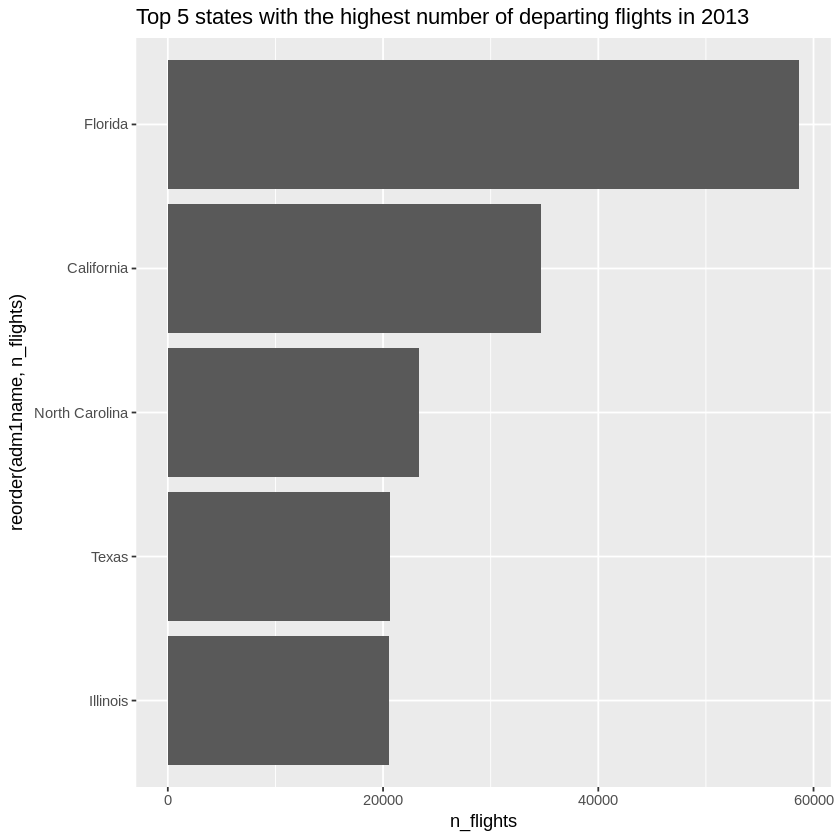

In [ ]:
styled_note("Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2013")
summaries_data13 # ตารางแสดงจำนวนเที่ยวบินที่บินไปในแต่ละรัฐ 2013
visualize_data13 # ตารางแสดงจำนวนเที่ยวบินที่บินไปในแต่ละรัฐ 2023


Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2023

adm1name,n_flights
<chr>,<int>
Florida,75388
California,34685
North Carolina,30388
Texas,27080
Virginia,23208


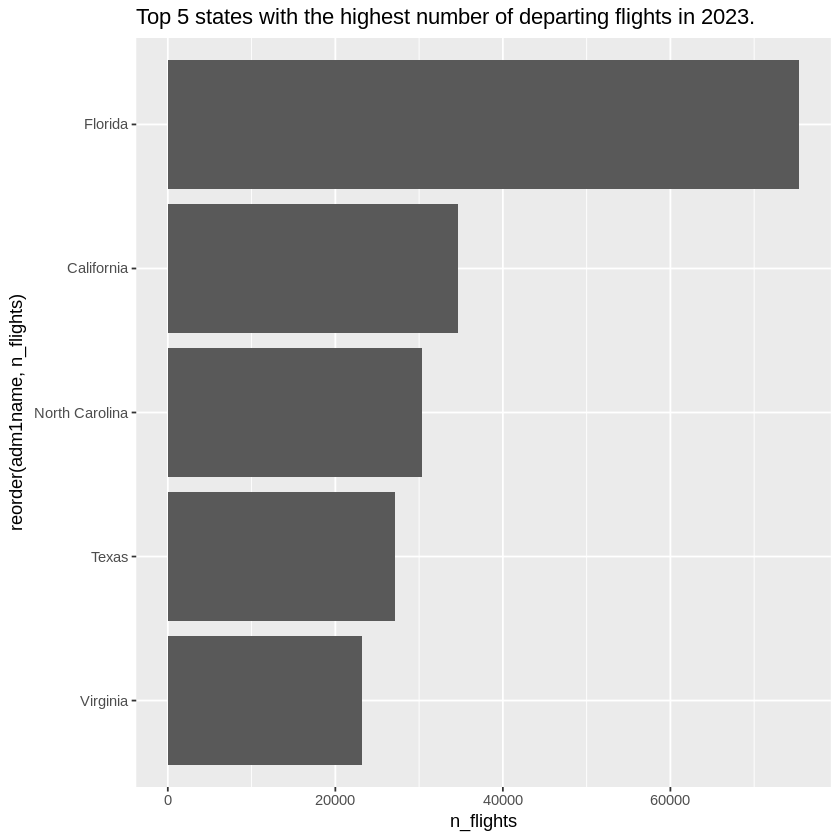

In [ ]:
styled_note("Top 5 รัฐที่มีจำนวนเที่ยวบินไปมากที่สุดในที่ 2023")
summaries_data23 # Bar Chart แสดงจำนวนเที่ยวบินที่บินไปในแต่ละรัฐ 2013
visualize_data23 # Bar Chart แสดงจำนวนเที่ยวบินที่บินไปในแต่ละรัฐ 2023

Time Series จำนวนเที่ยวบินในแต่ละเดือนไป Florida

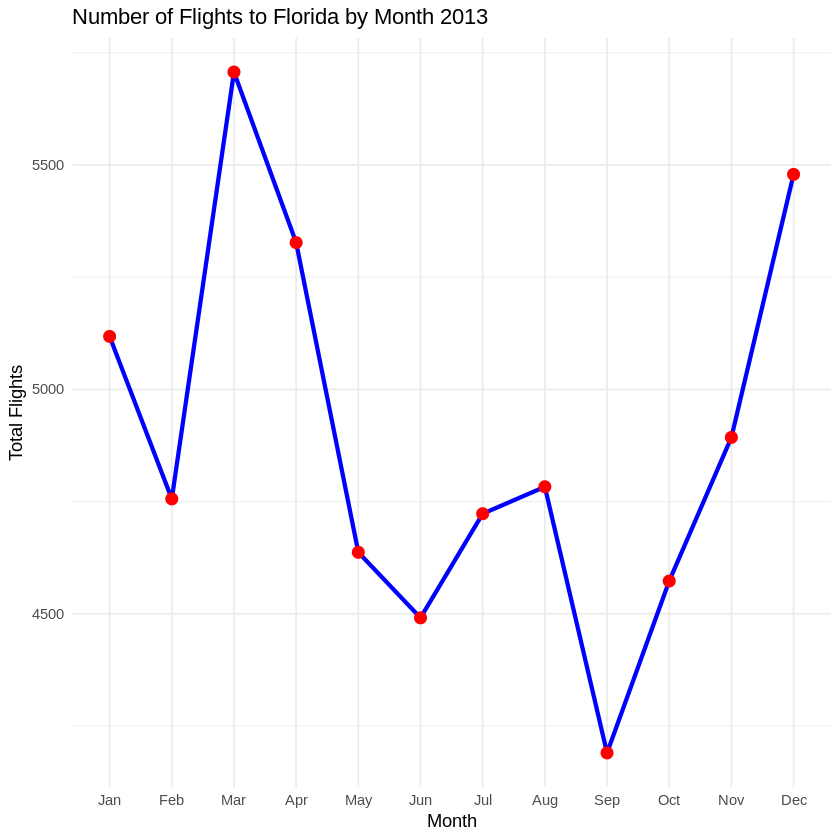

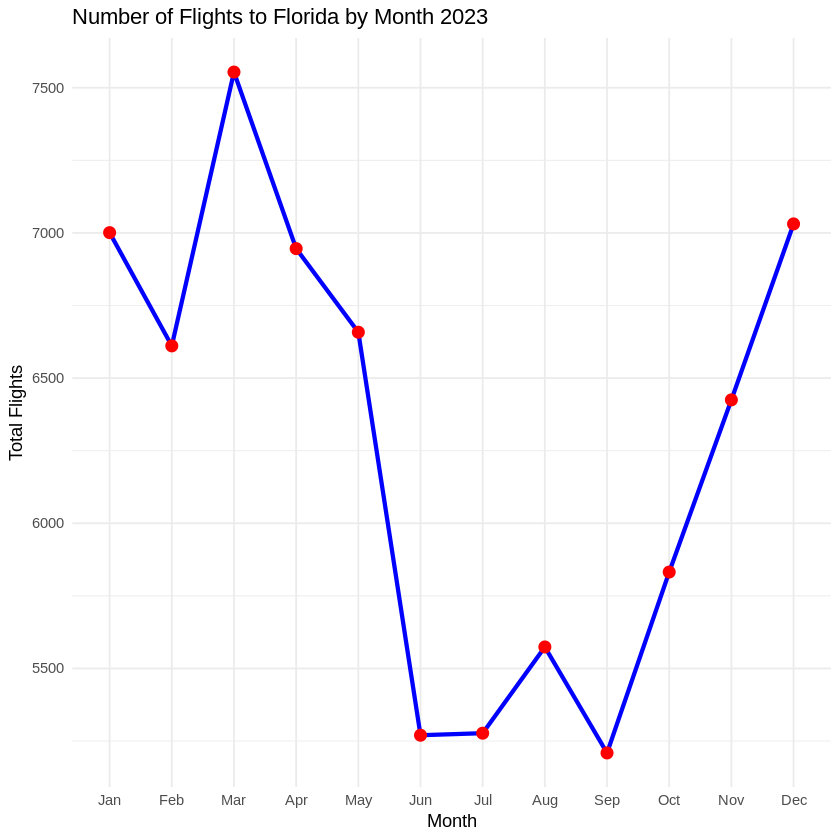

In [ ]:
styled_note("Time Series จำนวนเที่ยวบินในแต่ละเดือนไป Florida")
season_travel_flights13 # trend line จำนวนเที่ยวบินในแต่ละเดือนในปี 2013
season_travel_flights23 # trend line จำนวนเที่ยวบินในแต่ละเดือนในปี 2023

In [ ]:
styled_note("ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2013")
the_best_airlines_2013 # ตารางแสดงรายละเอียดเวลาบินไป Florida 2013

ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2013

name,time_delay_per_flight,air_time_per_flight
<chr>,<dbl>,<dbl>
American Airlines Inc.,5,151
Envoy Air,10,144
Delta Air Lines Inc.,11,147
United Air Lines Inc.,14,146
Endeavor Air Inc.,24,128
JetBlue Airways,25,144
ExpressJet Airlines Inc.,34,123


In [ ]:
styled_note("ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2023")
the_best_airlines_2023 # ตารางแสดงรายละเอียดเวลาบิน Florida 2023

ตารางรายละเอียดสายการบินเรื่อง เวลาการเดินทาง ขาออก-ขาเข้า และขณะเดินทางไป Florida ในปี 2023

name,time_delay_per_flight,air_time_per_flight
<chr>,<dbl>,<dbl>
Allegiant Air,-7,140
Republic Airline,-2,150
Endeavor Air Inc.,7,124
American Airlines Inc.,19,154
Delta Air Lines Inc.,20,146
United Air Lines Inc.,28,144
Spirit Air Lines,32,145
Envoy Air,34,156
JetBlue Airways,45,145


Line Chart ย่อยแสดงความสัมพันธ์เวลาชั่วโมง เทียบกับ ความน่าเป็นที่ฝนตก ในแต่ละช่วงเดือน 2013,2023

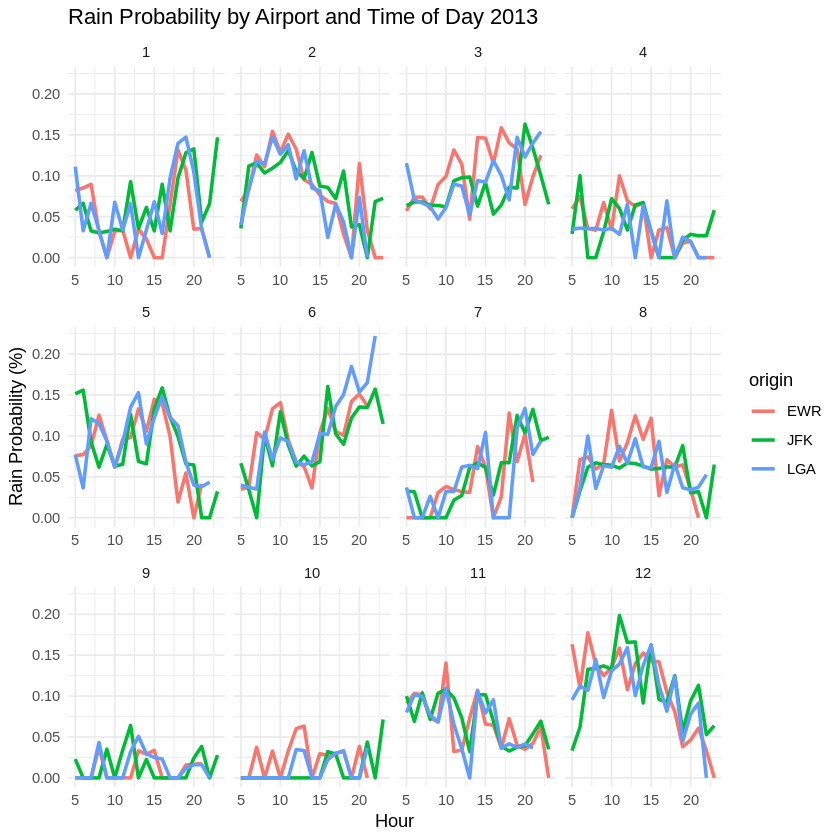

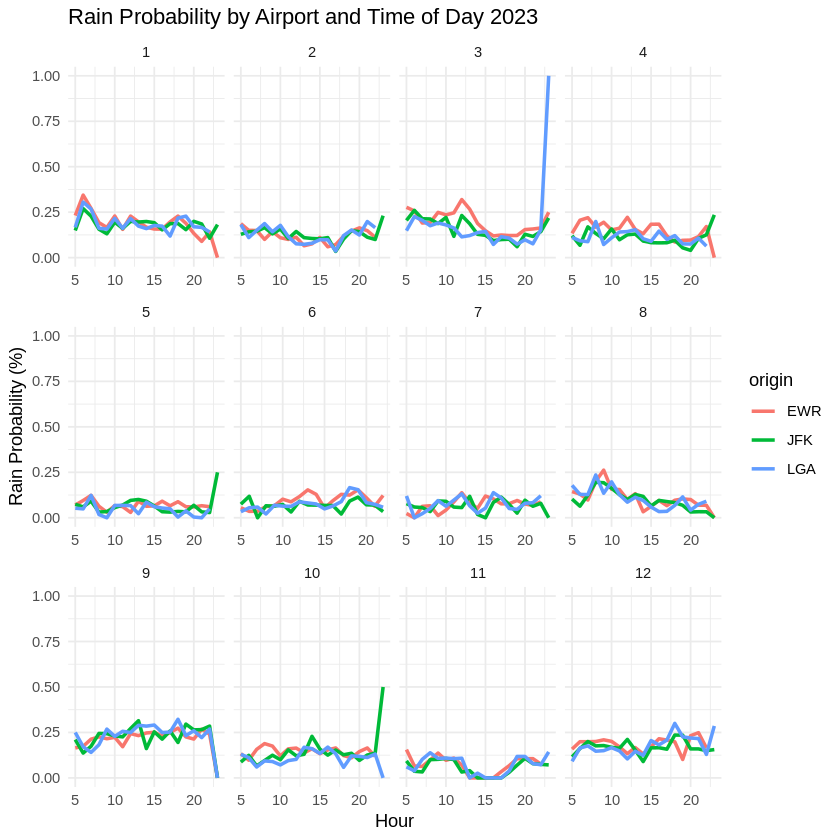

In [ ]:
styled_note("Line Chart ย่อยแสดงความสัมพันธ์เวลาชั่วโมง เทียบกับ ความน่าเป็นที่ฝนตก ในแต่ละช่วงเดือน 2013,2023")
flights_weather_2013 # line chrat ย่อยของปี 2013
flights_weather_2023 # line chrat ย่อยของปี 2013

# End ❤️‍🔥 Thank you so much. see you soon.